In [33]:
import pandas as pd
PATH = "rijs_iML1515_AMN.csv"
all_data = pd.read_csv(PATH, encoding="utf-8")
all_data_norm = (all_data - all_data.mean()) - all_data.std()
all_data

,EX_pi_e_i,EX_co2_e_i,EX_fe3_e_i,EX_h_e_i,EX_mn2_e_i,EX_fe2_e_i,EX_zn2_e_i,EX_mg2_e_i,EX_ca2_e_i,EX_ni2_e_i,...,PFK,PGI_for,PGK_rev,PGM_rev,PPC,PPCK,PTAr_for,PYK,SUCDi,TALA_for
0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,1.61,1.48,3.50,3.50,0.45,0.74,0.11,3.34,1.18,0.11
1,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,1.68,1.54,3.57,3.57,0.49,0.92,0.03,3.51,1.09,0.12
2,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,1.59,1.40,3.34,3.34,0.39,0.90,0.15,3.45,1.10,0.13
3,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,1.69,1.63,3.68,3.68,0.38,0.82,0.04,3.68,1.67,0.07
4,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,2.17,1.99,4.50,4.50,0.57,1.03,0.05,4.48,1.99,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,5.78,5.20,12.65,12.65,2.56,0.31,4.79,8.98,1.26,0.44
124,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,5.27,4.56,11.09,11.09,2.43,0.60,4.16,8.06,0.87,0.48
125,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,5.31,4.68,11.63,11.63,1.91,0.25,4.94,8.72,0.90,0.45
126,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,6.69,5.93,13.76,13.76,2.61,0.32,5.81,10.16,1.10,0.51


In [34]:
X = all_data_norm.iloc[:,:89].values
Y = all_data_norm.iloc[:,89:].values
print(X.shape, Y.shape)

(128, 89) (128, 31)


In [35]:
X = all_data.iloc[:,:89].values
Y = all_data.iloc[:,89:].values
print(X.shape, Y.shape)

(128, 89) (128, 31)


In [36]:
# XGBoost
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn
import xgboost as xgb # must be in AMN_windows env
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.multioutput import MultiOutputRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Tuple, List
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.linear_model import LinearRegression as lr
from sklearn.neural_network import MLPRegressor

In [12]:
LOO_split = int(Y.shape[0])

xgb_preds = []

for i in range(5):

    # XGBoost = xgb.XGBRegressor(n_estimators=600, max_depth=2, learning_rate=0.01, objective='reg:squarederror', random_state=i)
    multioutputregressor = MultiOutputRegressor(lr())

    xgb_pred = cvp(multioutputregressor, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=i), n_jobs = 5)
    
    xgb_preds.append(xgb_pred)

In [14]:
LOO_split = int(Y.shape[0])

xgb_preds = []

for i in range(5):

    # XGBoost = xgb.XGBRegressor(n_estimators=600, max_depth=2, learning_rate=0.01, objective='reg:squarederror', random_state=i)
    multioutputregressor = MultiOutputRegressor(rfr(n_estimators=1000, max_depth=None, random_state=i))

    xgb_pred = cvp(multioutputregressor, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=i), n_jobs = 5)
    
    xgb_preds.append(xgb_pred)

In [40]:
LOO_split = int(Y.shape[0])

xgb_preds = []

for i in range(5):

    # XGBoost = xgb.XGBRegressor(n_estimators=600, max_depth=2, learning_rate=0.01, objective='reg:squarederror', random_state=i)
    multioutputregressor = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(500,), solver='adam', activation='identity', max_iter=10000, learning_rate='adaptive', validation_fraction=0.1, early_stopping=True))

    xgb_pred = cvp(multioutputregressor, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=i), n_jobs = 5)
    
    xgb_preds.append(xgb_pred)

In [28]:
LOO_split = int(Y.shape[0])

xgb_preds = []

for i in range(5):

    # XGBoost = xgb.XGBRegressor(n_estimators=600, max_depth=2, learning_rate=0.01, objective='reg:squarederror', random_state=i)
    multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror'))

    xgb_pred = cvp(multioutputregressor, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=i), n_jobs = 5)
    
    xgb_preds.append(xgb_pred)

In [41]:
mean_xgb_pred = np.array(xgb_preds).mean(axis=0)
std_xgb = np.array(xgb_preds).std(axis=0)

# print(np.mean((mean_xgb_pred - Y)**2, axis=0)) # MSE between mean prediction (over 5 times 10-fold test sets) and true

print("Mean pred VS True Q²: variance weighted ", r2_score(Y, mean_xgb_pred, multioutput='variance_weighted'), " uniform ", r2_score(Y, mean_xgb_pred, multioutput='uniform_average'))

print("Each iteration Q²")
for xgb_pred in xgb_preds:
    print(r2_score(Y, xgb_pred, multioutput='variance_weighted'))

Mean pred VS True Q²: variance weighted  0.8008647639049081  uniform  -0.3632337095144337
Each iteration Q²
0.5987222290712192
0.6261730981205897
0.6566498016494643
0.574928676407366
0.5224693920786464


In [30]:
mean_xgb_pred_df = pd.DataFrame(mean_xgb_pred, columns=all_data.iloc[:,89:].columns)
mean_xgb_pred_df

,ACKr_rev,ACONTa_for,ACONTb_for,BIOMASS_Ec_iML1515_core_75p37M,CS,EDA,EDD,ENO_for,EX_ac_e_o,EX_gal_e_i_MEASURE,...,PFK,PGI_for,PGK_rev,PGM_rev,PPC,PPCK,PTAr_for,PYK,SUCDi,TALA_for
0,0.679717,1.761085,1.761085,0.201738,1.761085,0.281311,0.281311,4.623858,0.497464,2.194497,...,2.317181,2.105548,4.971033,4.971033,0.648542,0.720546,0.679717,4.534447,1.380111,0.165671
1,-0.184516,1.855110,1.855110,0.177218,1.855110,-0.035733,-0.035733,3.400439,-0.140318,2.170865,...,1.807440,1.601128,3.657059,3.657059,0.630283,0.813337,-0.184516,3.462628,1.514626,0.161564
2,0.230332,1.546415,1.546415,0.184195,1.546415,0.286039,0.286039,3.387724,0.249702,2.179588,...,1.628804,1.462796,3.665466,3.665466,0.496881,0.700434,0.230332,3.452712,1.236498,0.132952
3,-0.244208,2.226378,2.226378,0.195709,2.226378,0.043497,0.043497,3.308015,-0.143692,2.201222,...,1.788357,1.710874,3.610745,3.610745,0.500180,0.727011,-0.244208,3.379800,1.908642,0.111110
4,0.105358,1.510160,1.510160,0.156025,1.510160,0.291366,0.291366,3.101192,0.171900,2.180915,...,1.604221,1.441312,3.365931,3.365931,0.430756,0.726330,0.105358,3.303535,1.234759,0.119078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,4.809828,1.653102,1.653102,0.520824,1.653102,0.584007,0.584007,11.299634,4.450986,-0.186178,...,5.670187,4.993456,12.153816,12.153816,2.299098,0.252009,4.809828,8.661463,0.811965,0.458495
124,4.810184,2.147729,2.147729,0.545331,2.147729,0.552778,0.552778,12.035910,4.452264,0.431840,...,6.076252,5.355425,12.935707,12.935707,2.459894,0.423089,4.810184,9.500307,1.302317,0.486394
125,4.813289,1.760587,1.760587,0.523228,1.760587,0.600284,0.600284,11.340192,4.453889,-0.185181,...,5.710512,5.040950,12.192503,12.192503,2.360646,0.188184,4.813289,8.673506,0.932871,0.465965
126,4.801333,1.865566,1.865566,0.539975,1.865566,0.560909,0.560909,11.567389,4.427619,0.028121,...,5.818272,5.161765,12.422804,12.422804,2.418115,0.278037,4.801333,8.898381,1.033365,0.472831


In [31]:
true_df = all_data.iloc[:,89:]
true_df

,ACKr_rev,ACONTa_for,ACONTb_for,BIOMASS_Ec_iML1515_core_75p37M,CS,EDA,EDD,ENO_for,EX_ac_e_o,EX_gal_e_i_MEASURE,...,PFK,PGI_for,PGK_rev,PGM_rev,PPC,PPCK,PTAr_for,PYK,SUCDi,TALA_for
0,0.11,1.48,1.48,0.18,1.48,0.26,0.26,3.22,0.11,2.00,...,1.61,1.48,3.50,3.50,0.45,0.74,0.11,3.34,1.18,0.11
1,0.03,1.40,1.40,0.19,1.40,0.20,0.20,3.27,0.03,2.26,...,1.68,1.54,3.57,3.57,0.49,0.92,0.03,3.51,1.09,0.12
2,0.15,1.36,1.36,0.18,1.36,0.13,0.13,3.09,0.15,2.64,...,1.59,1.40,3.34,3.34,0.39,0.90,0.15,3.45,1.10,0.13
3,0.04,1.94,1.94,0.18,1.94,0.32,0.32,3.42,0.04,2.08,...,1.69,1.63,3.68,3.68,0.38,0.82,0.04,3.68,1.67,0.07
4,0.05,2.30,2.30,0.18,2.30,0.14,0.14,4.21,0.05,2.65,...,2.17,1.99,4.50,4.50,0.57,1.03,0.05,4.48,1.99,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,4.79,2.14,2.14,0.58,2.14,0.97,0.97,11.75,4.38,0.00,...,5.78,5.20,12.65,12.65,2.56,0.31,4.79,8.98,1.26,0.44
124,4.16,1.62,1.62,0.48,1.62,0.35,0.35,10.34,4.00,0.00,...,5.27,4.56,11.09,11.09,2.43,0.60,4.16,8.06,0.87,0.48
125,4.94,1.67,1.67,0.51,1.67,0.85,0.85,10.85,4.94,0.00,...,5.31,4.68,11.63,11.63,1.91,0.25,4.94,8.72,0.90,0.45
126,5.81,1.92,1.92,0.53,1.92,0.18,0.18,12.93,5.64,0.00,...,6.69,5.93,13.76,13.76,2.61,0.32,5.81,10.16,1.10,0.51


Text(0, 0.5, 'Q² between measured and predicted flux')

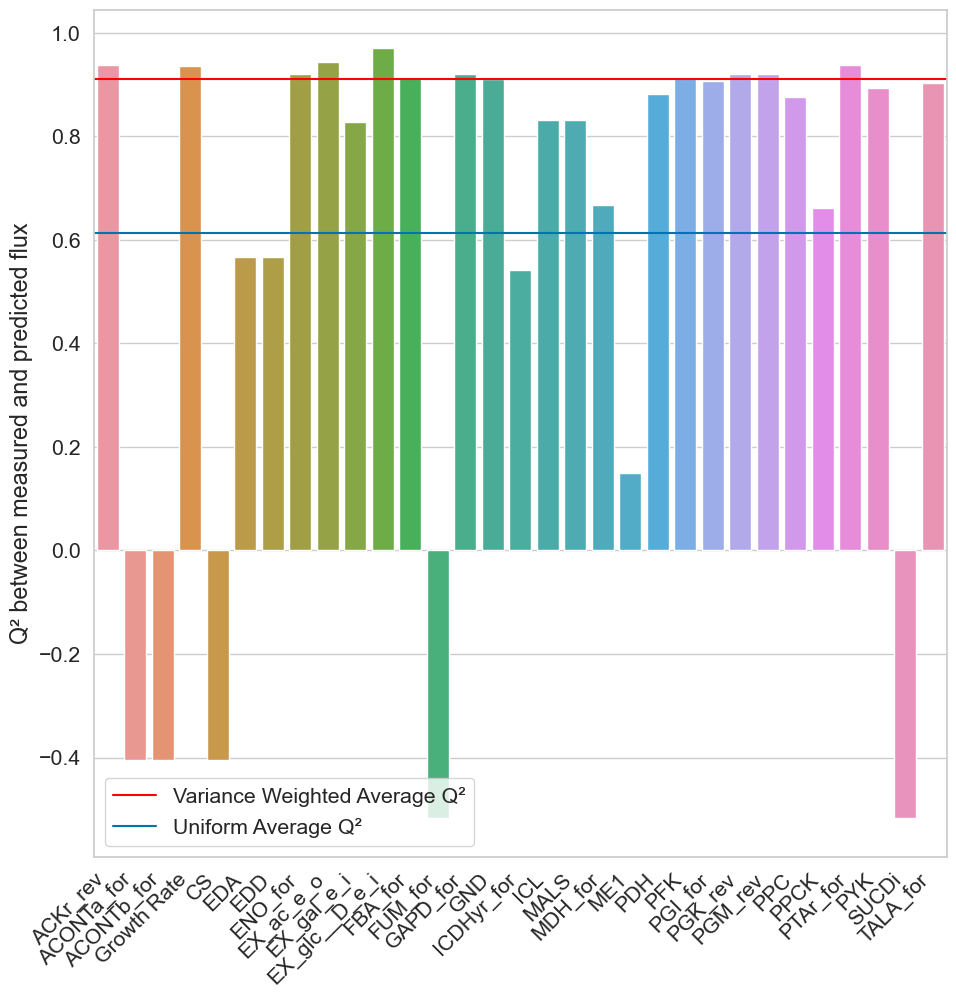

In [32]:
var_weighted = r2_score(true_df.values, mean_xgb_pred_df.values, multioutput='variance_weighted')
uniform = r2_score(true_df.values, mean_xgb_pred_df.values, multioutput='uniform_average')

Q2s = []
labels = []

for flux in true_df.columns:
    TRUE = true_df[flux]
    PRED = mean_xgb_pred_df[flux]

    if "MEASURE" in flux:
        label = str(flux)[:-8]
    else:
        label = str(flux)

    if "BIOMASS" in flux:
        label="Growth Rate"

    Q2s.append(r2_score(TRUE, PRED))
    labels.append(label)

sns.set(font='arial', palette="colorblind", style="whitegrid", font_scale=1.4, rc={'figure.figsize':(11,11)})
# fig, ax = plt.subplots(figsize=(12, 8))

g = sns.barplot(x=labels, y=Q2s)
g.axhline(var_weighted, label="Variance Weighted Average Q²", color="red")
g.axhline(uniform, label="Uniform Average Q²")
g.legend(loc='best')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Q² between measured and predicted flux")
# plt.xlabel("Flux")

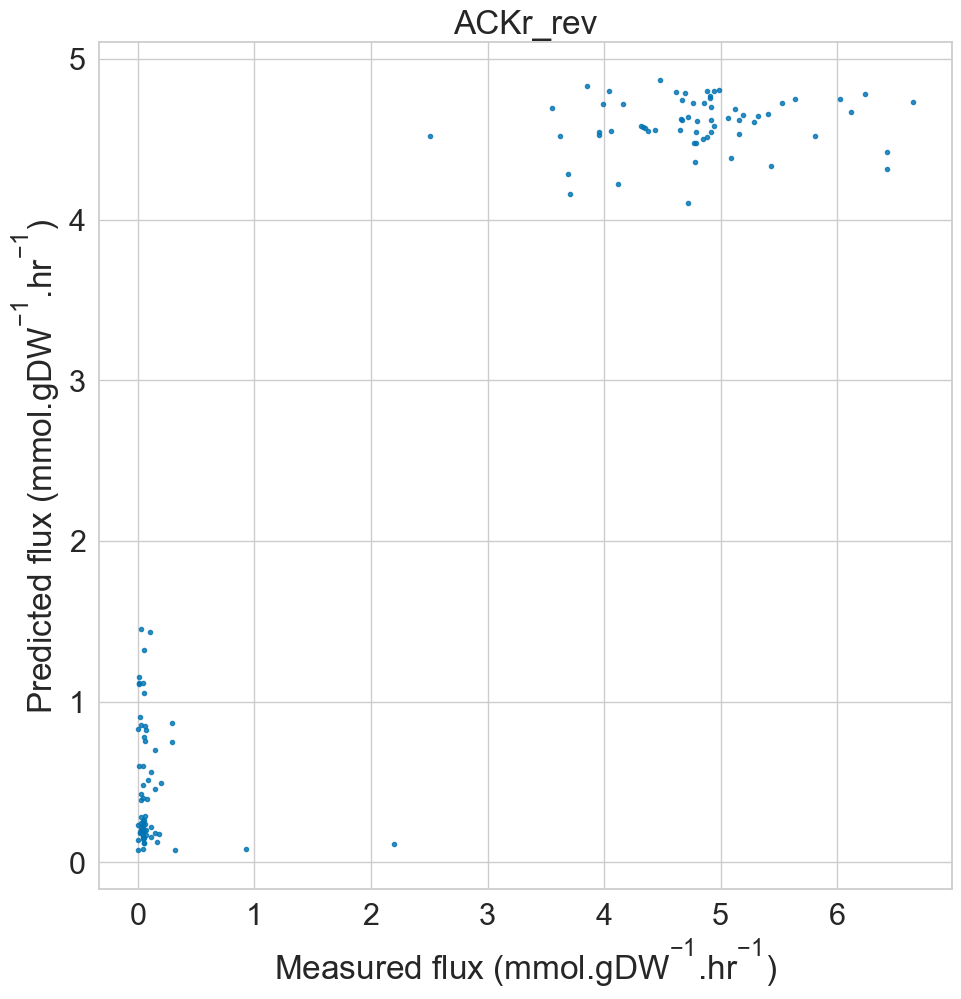

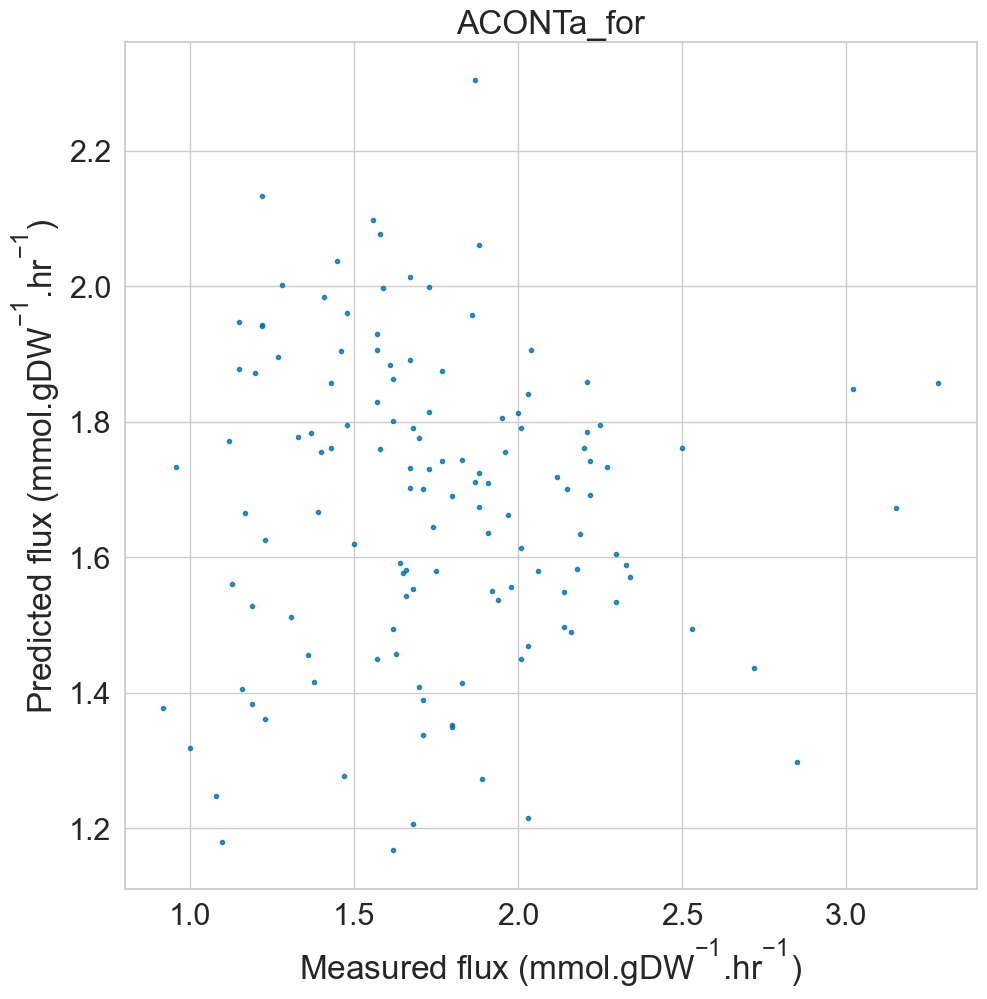

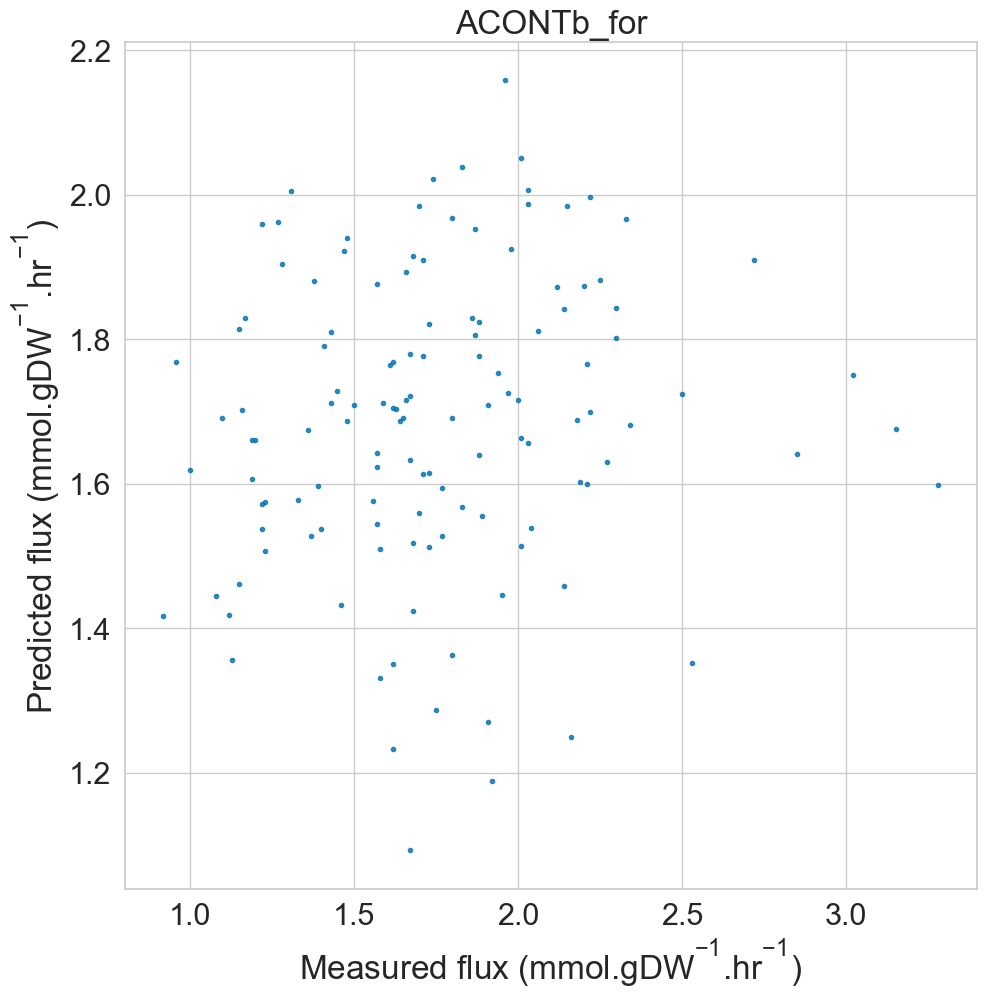

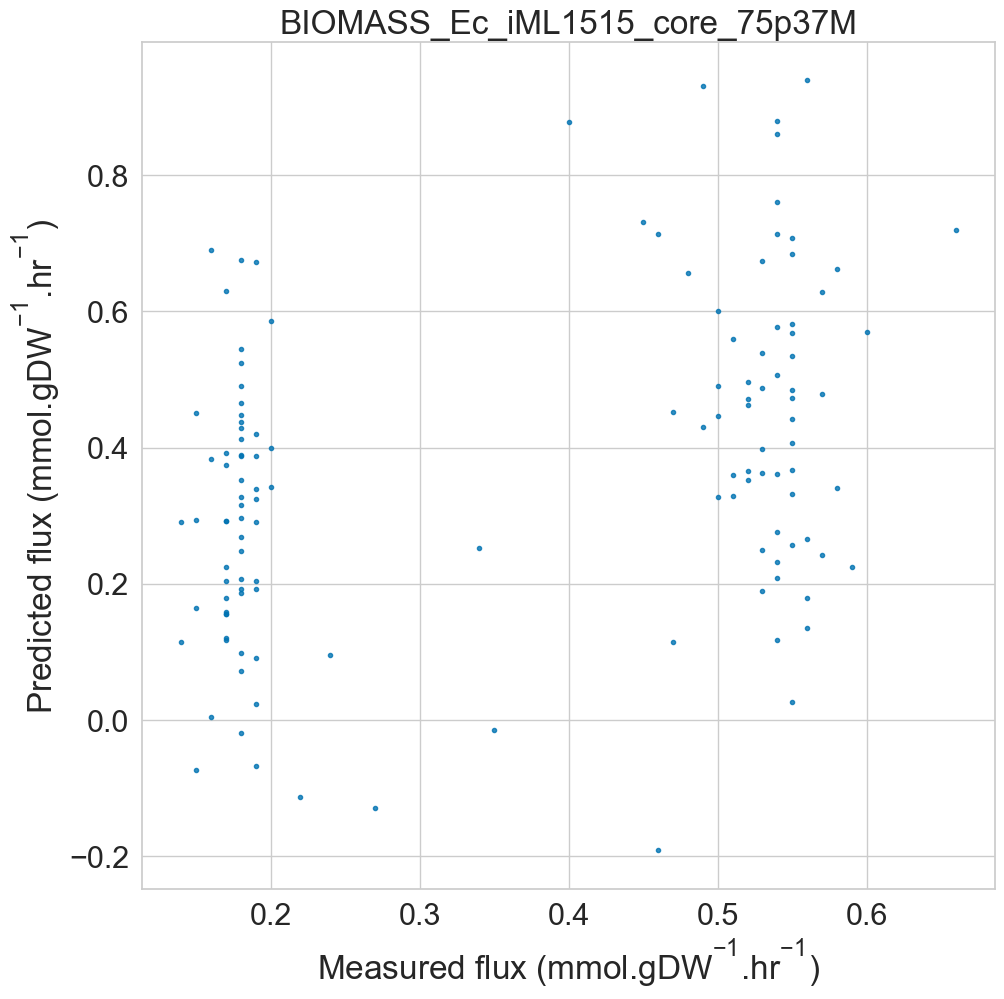

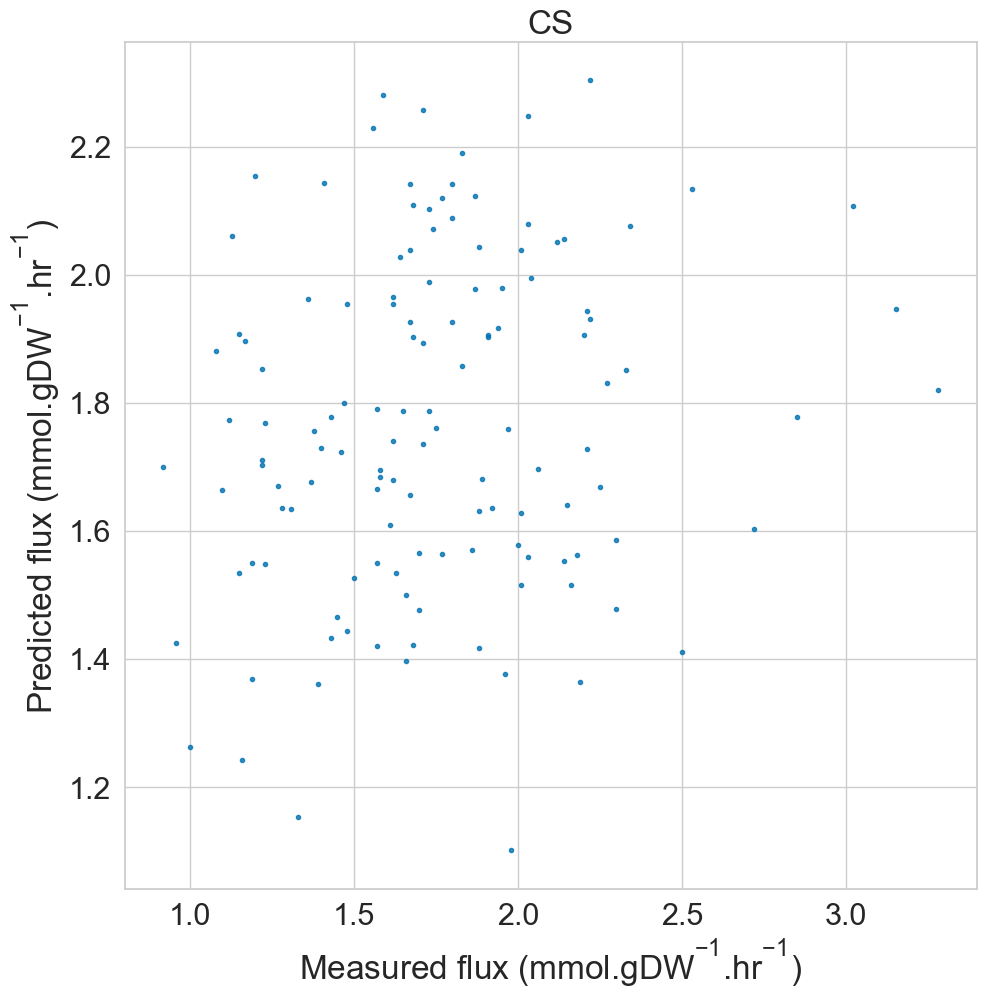

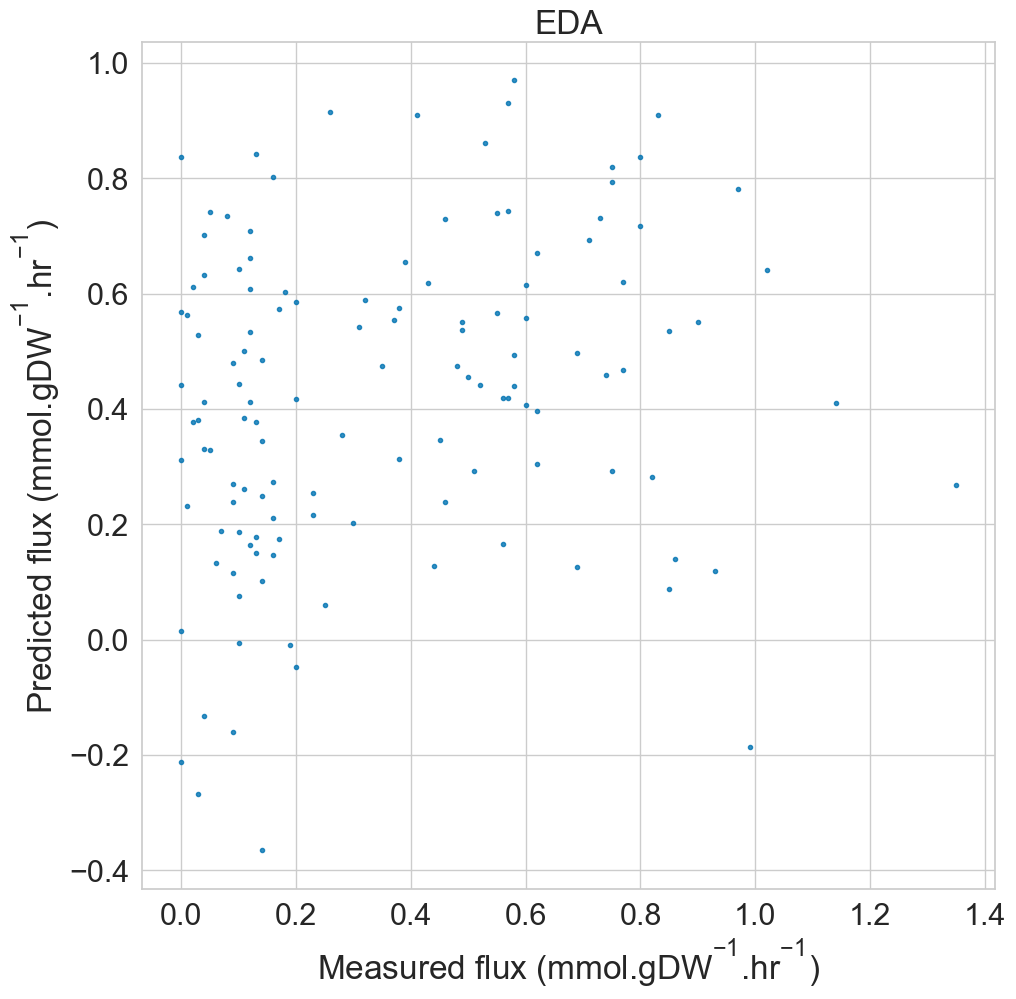

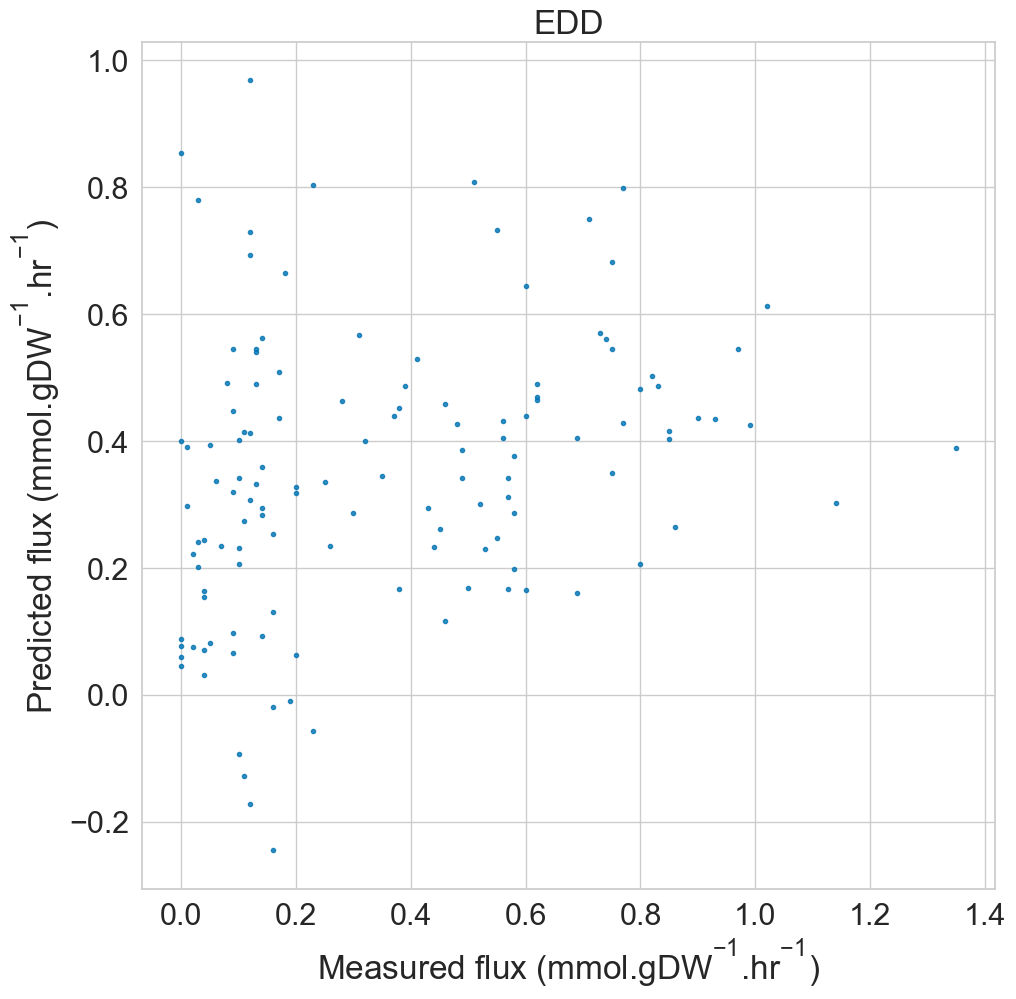

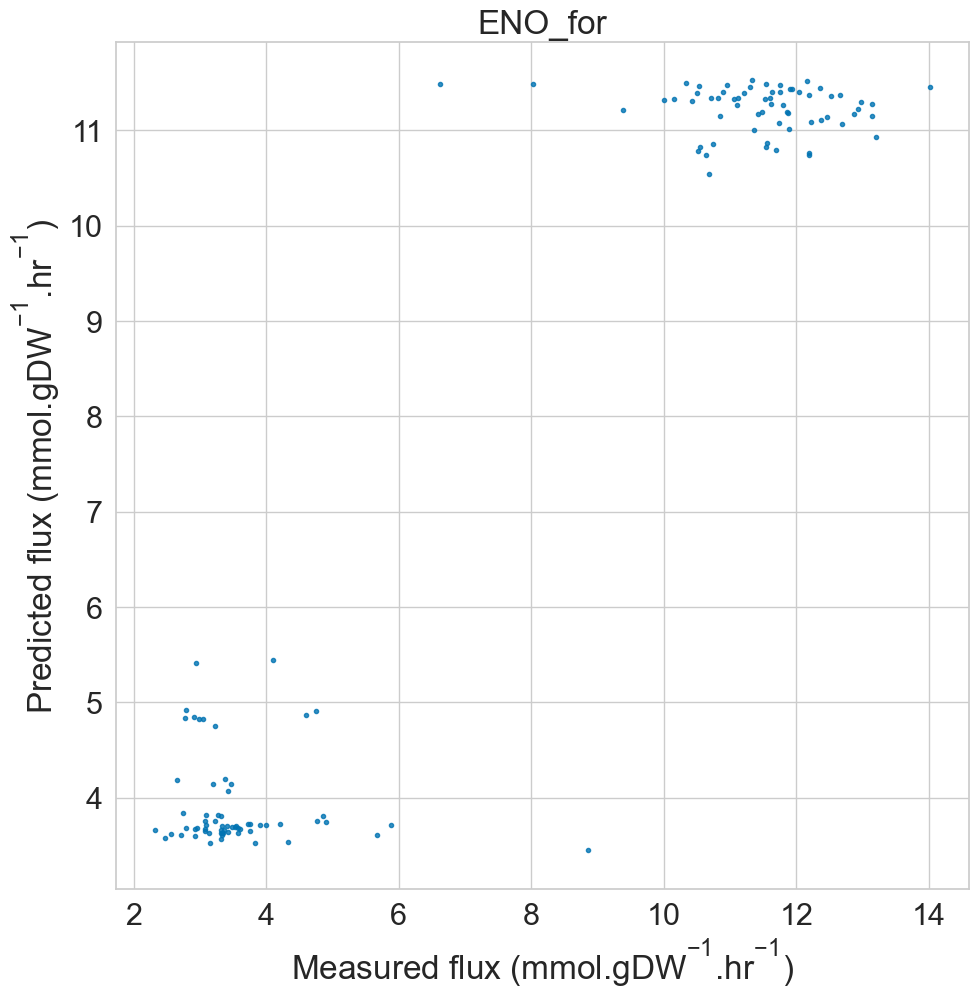

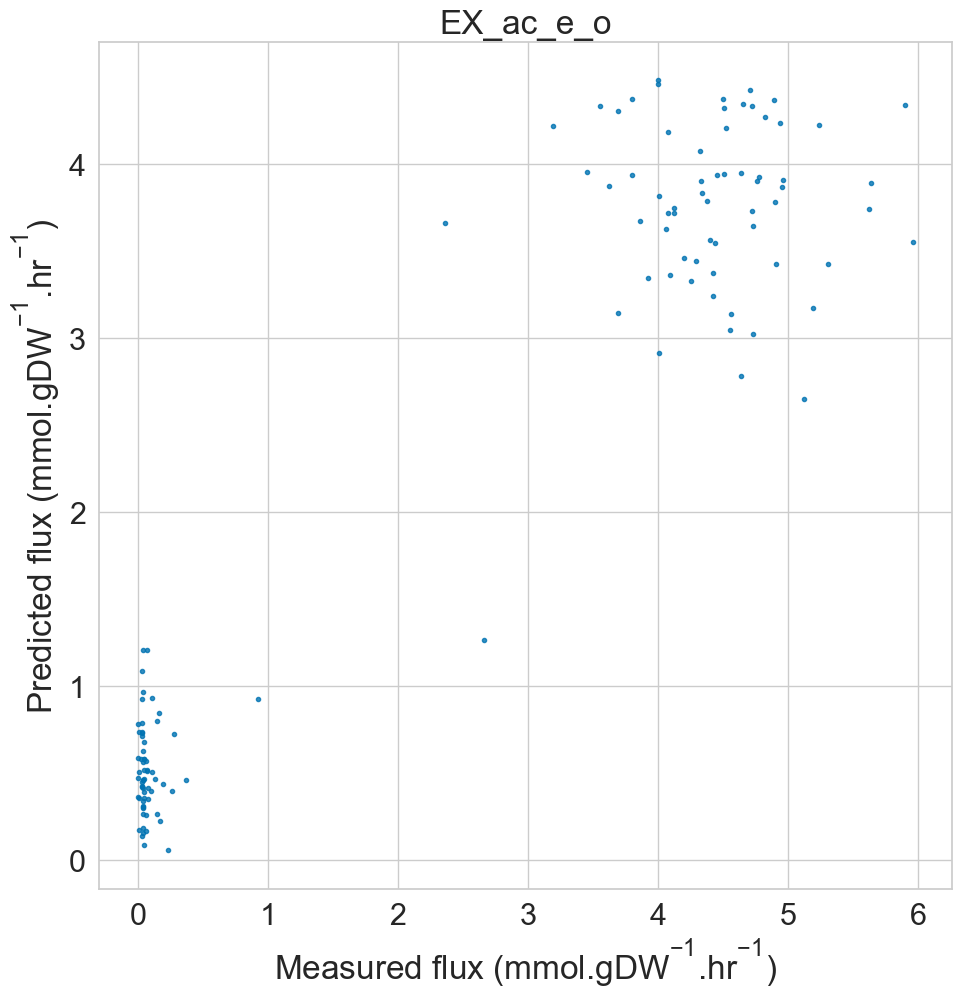

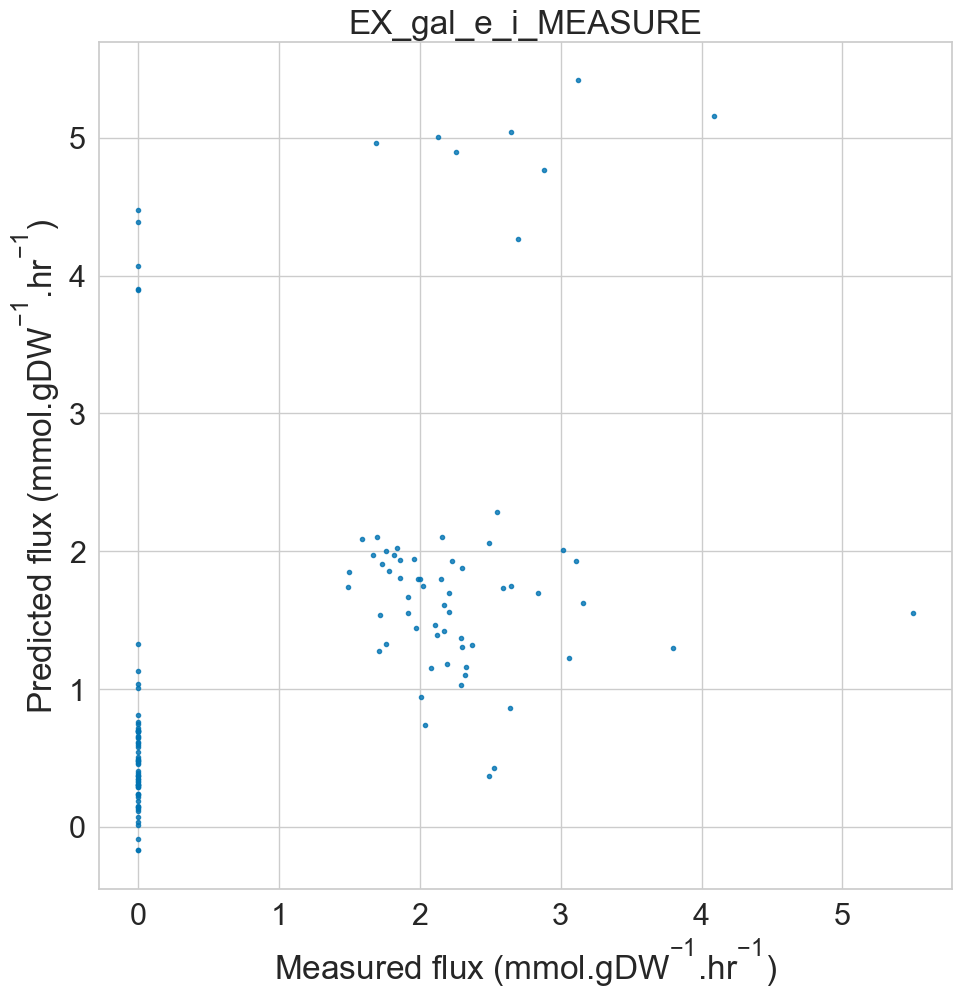

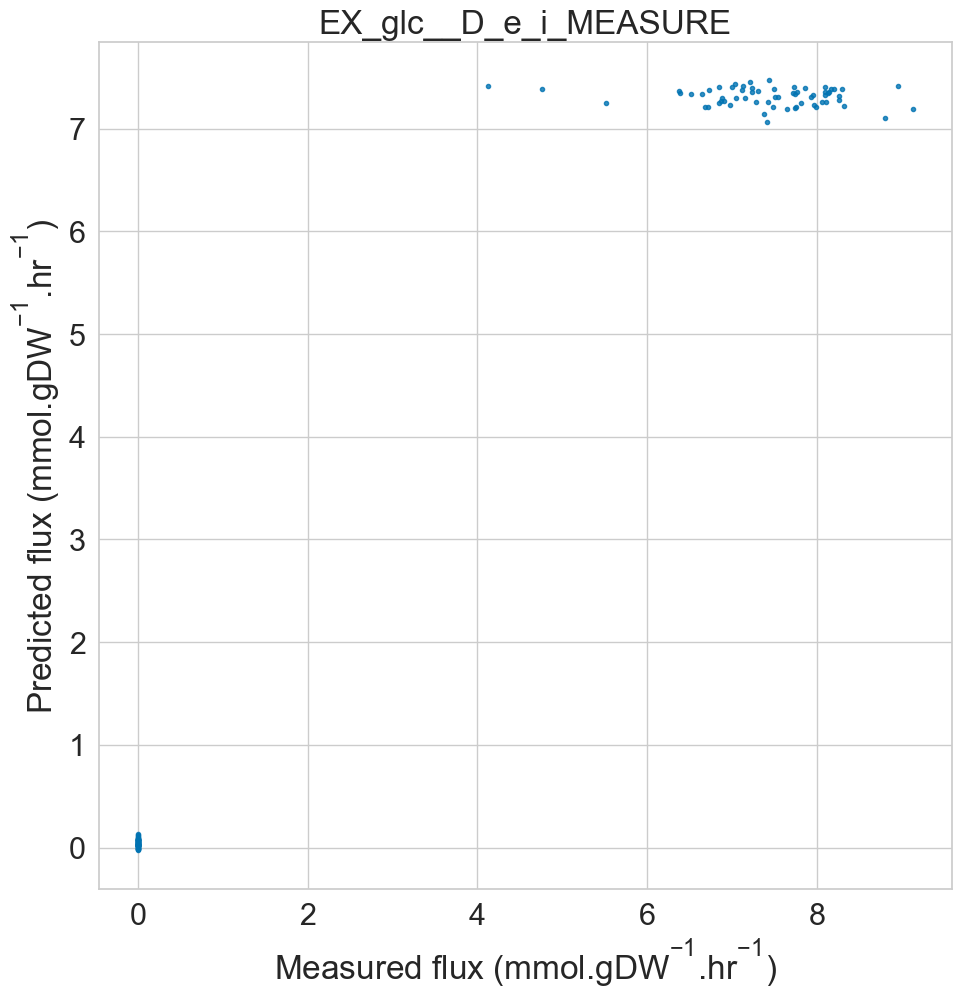

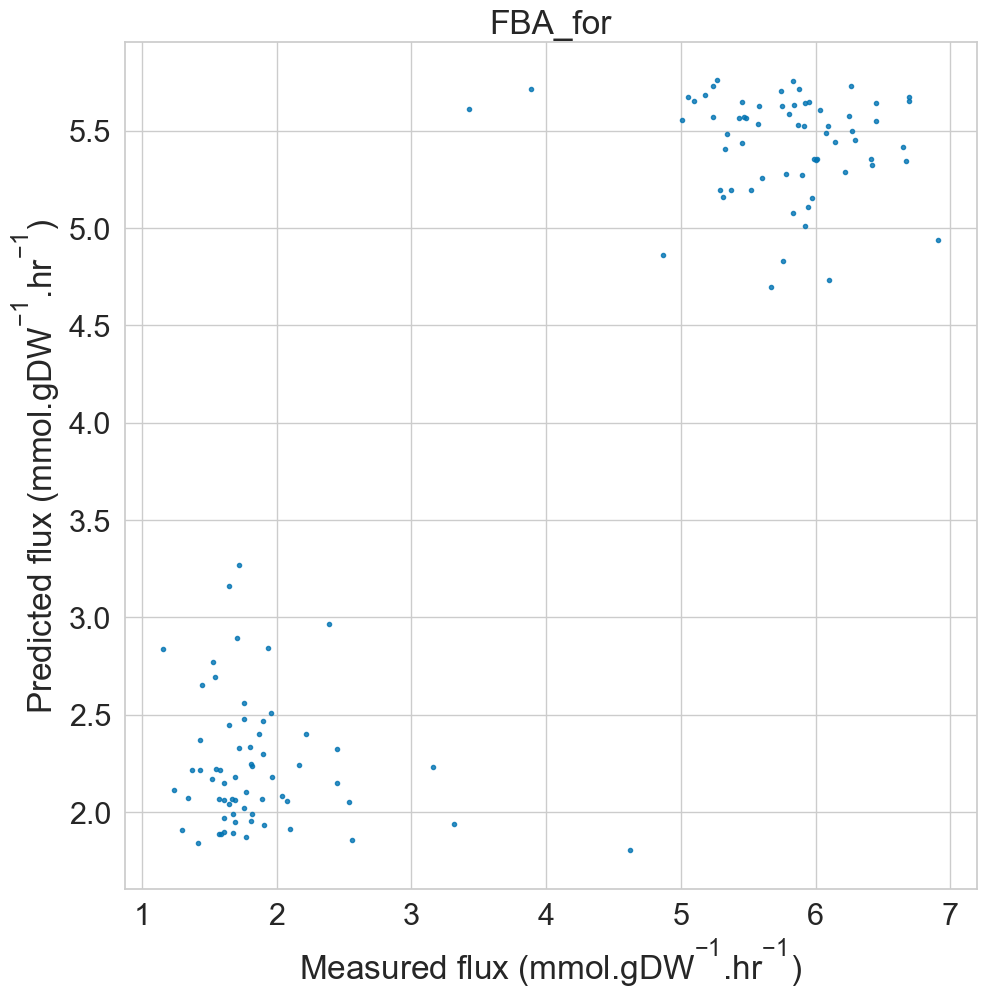

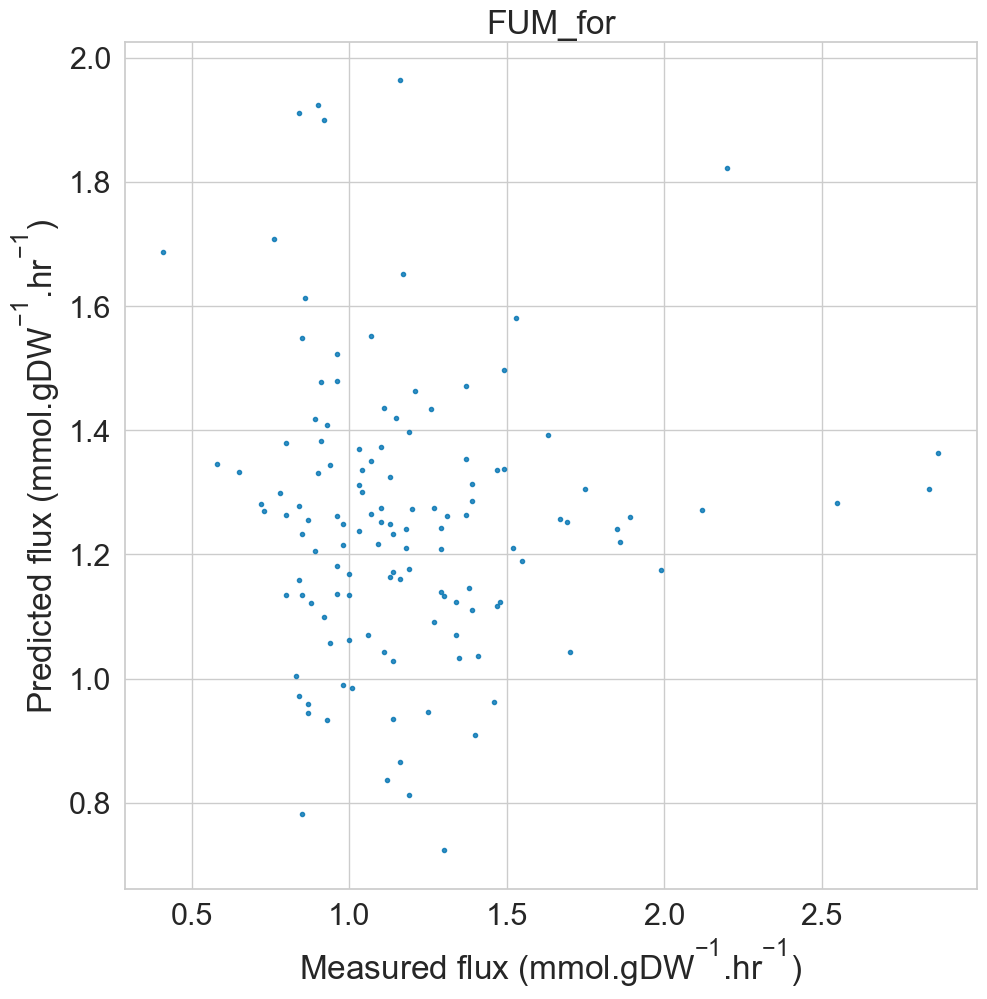

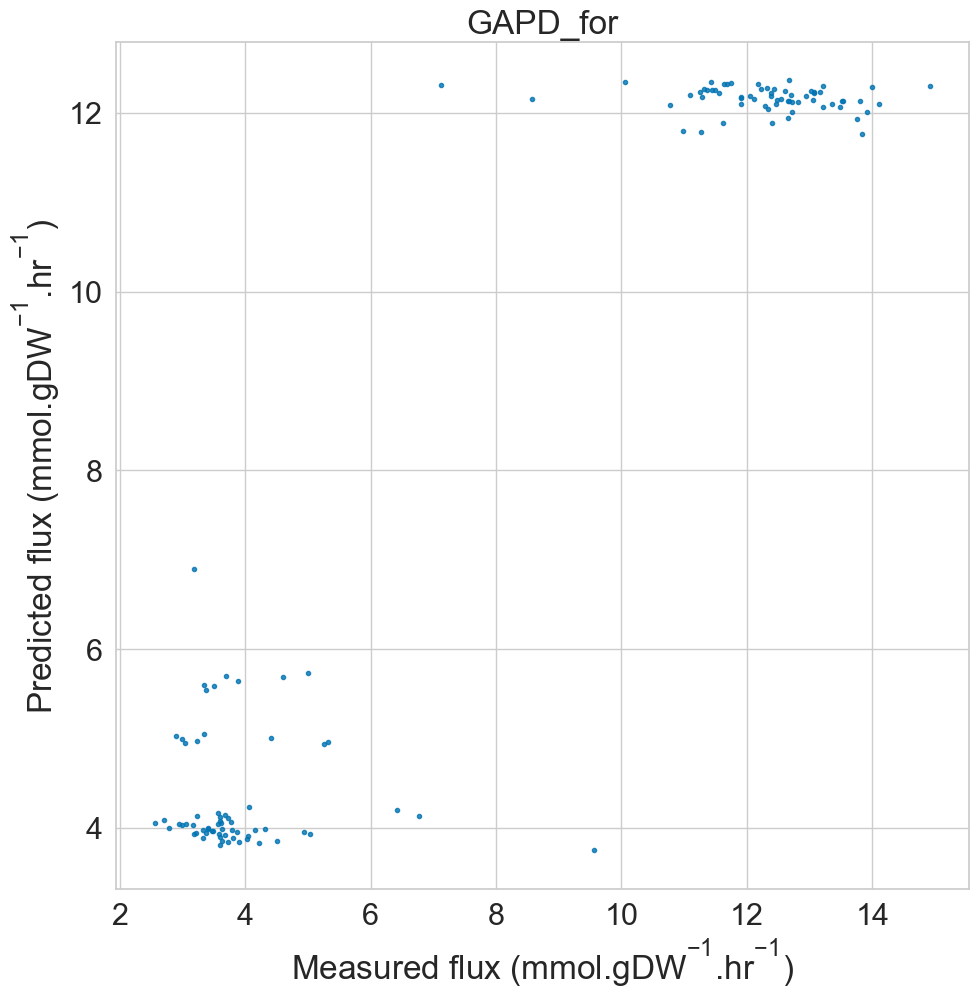

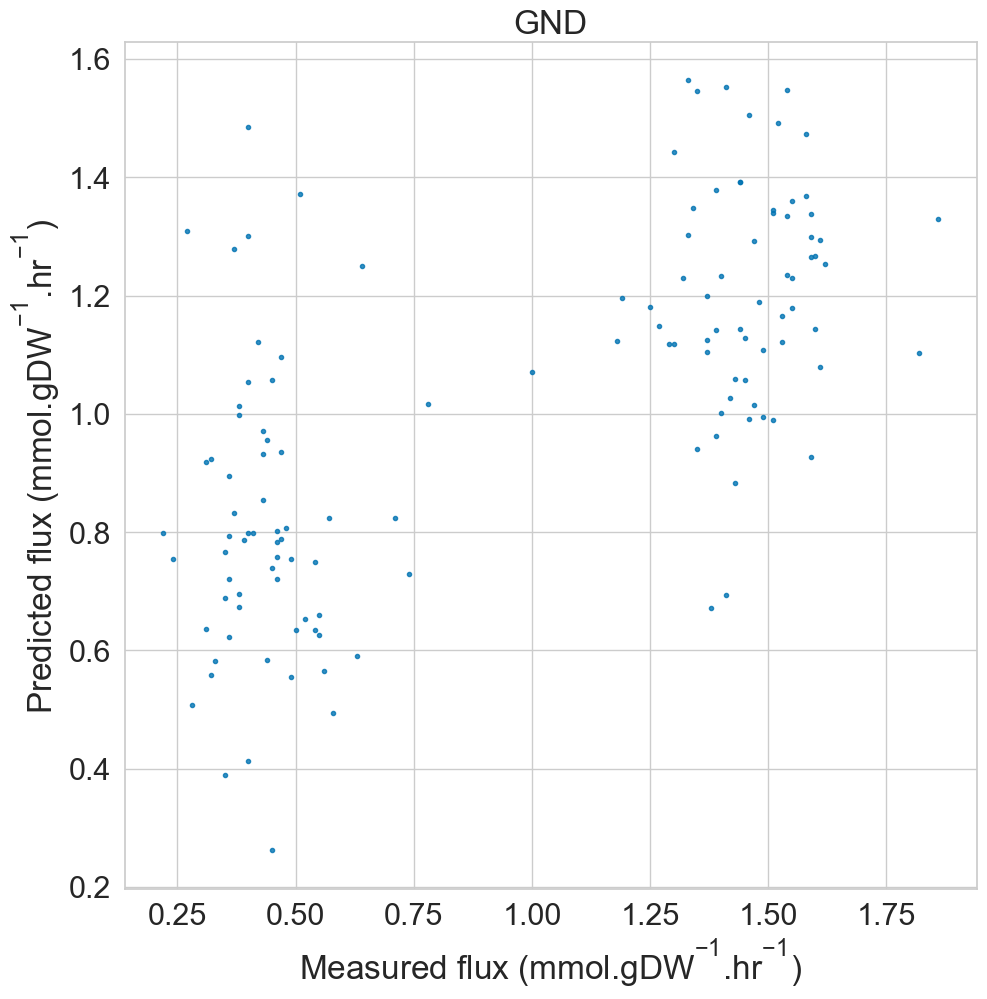

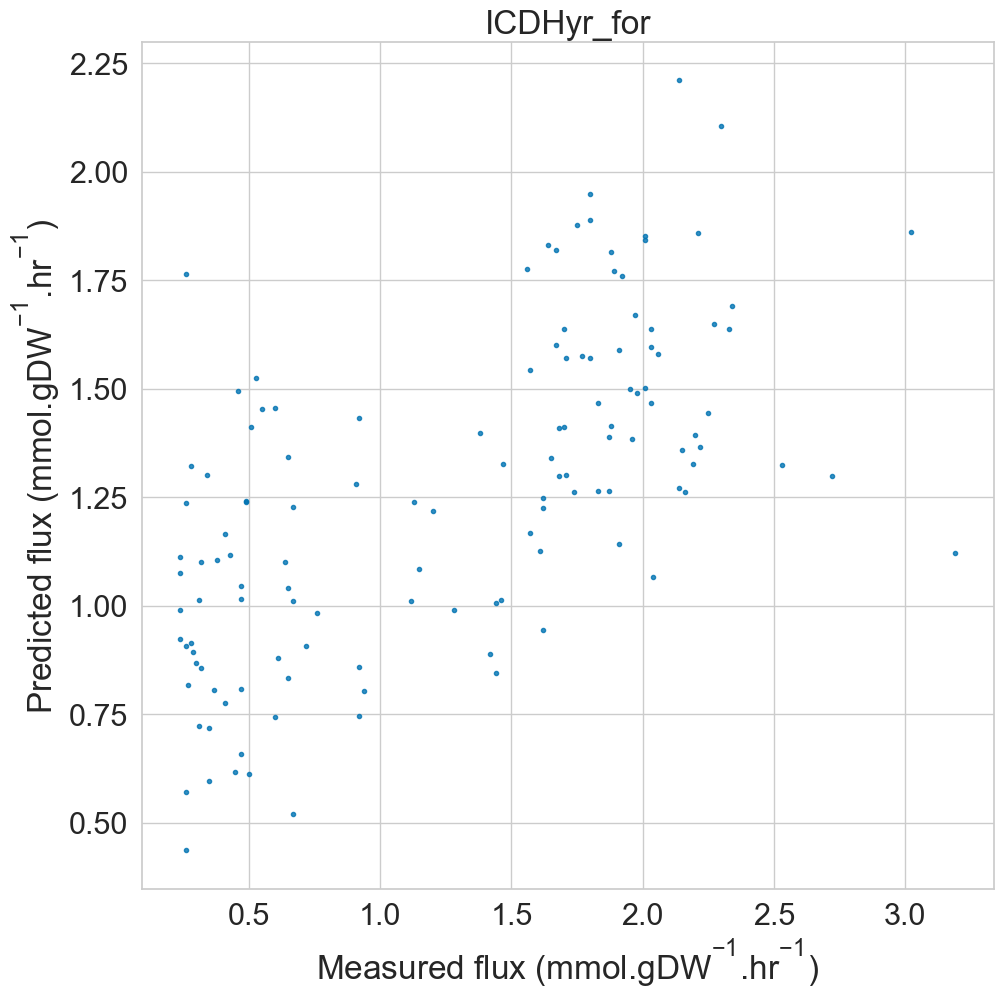

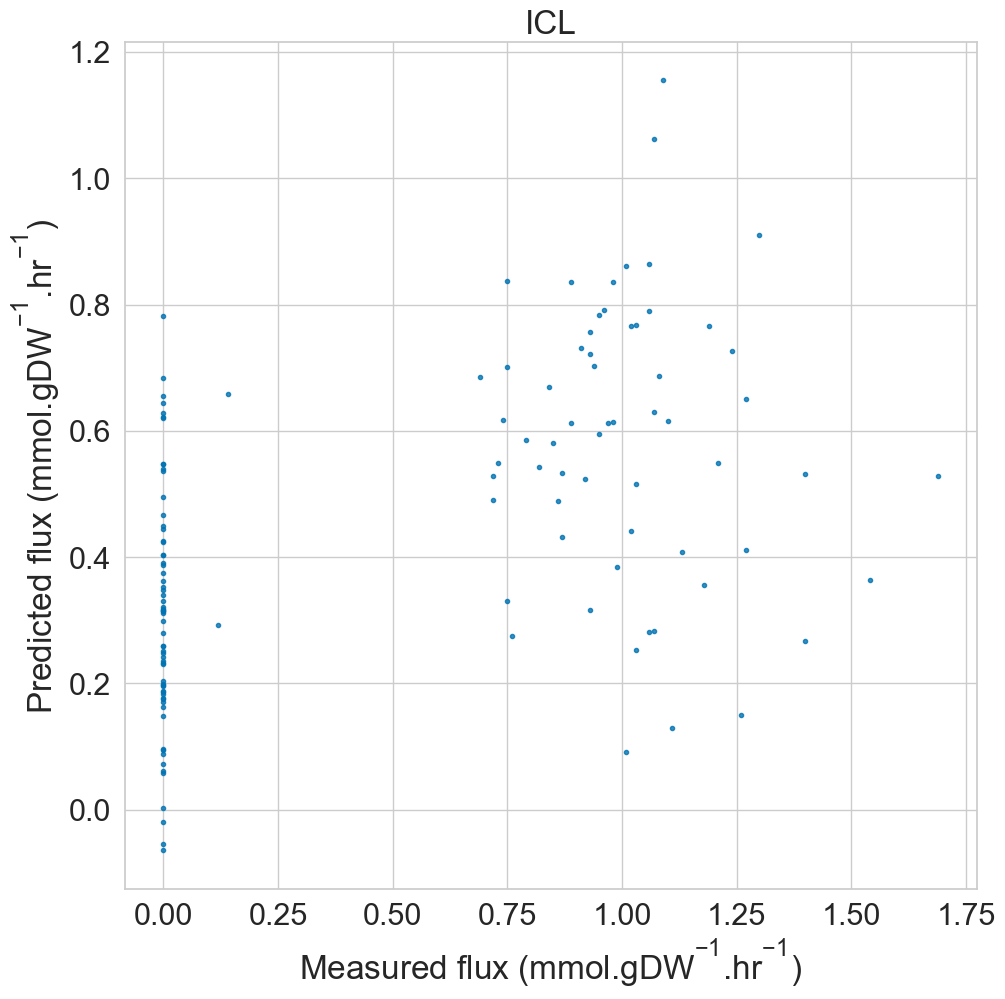

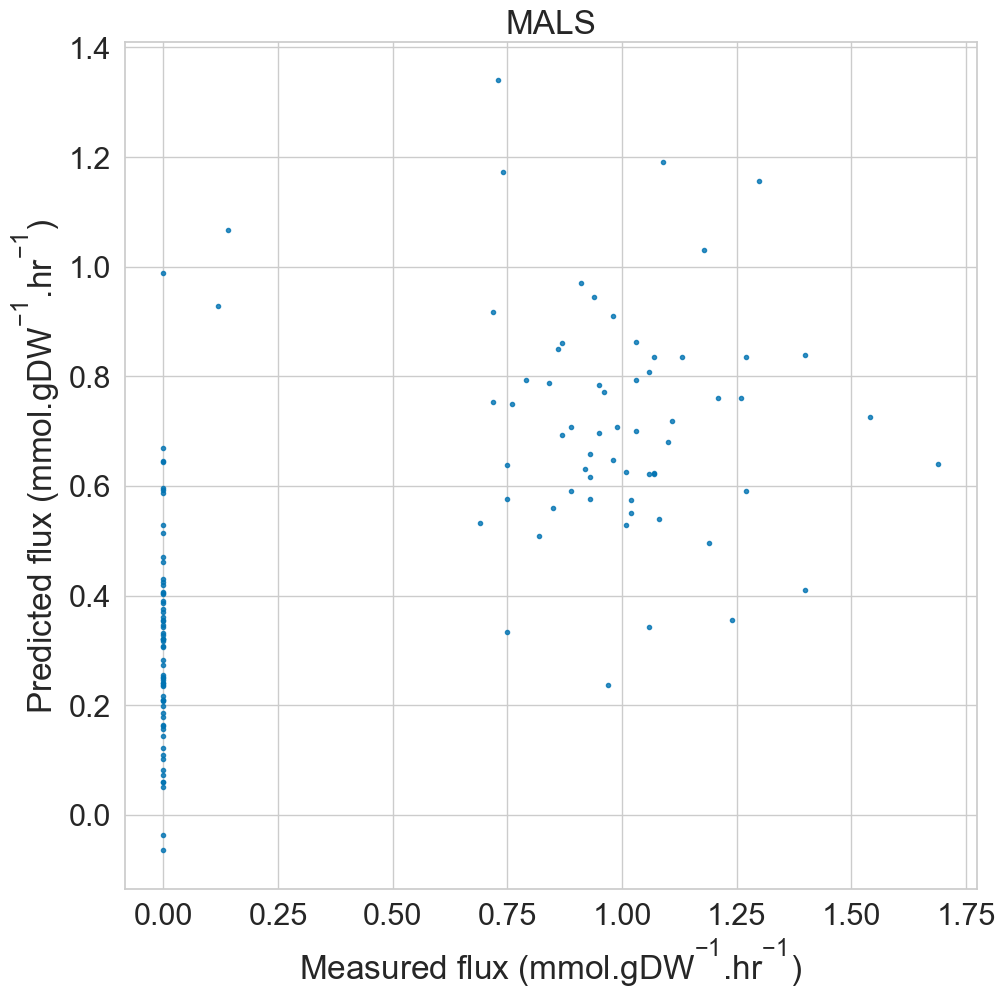

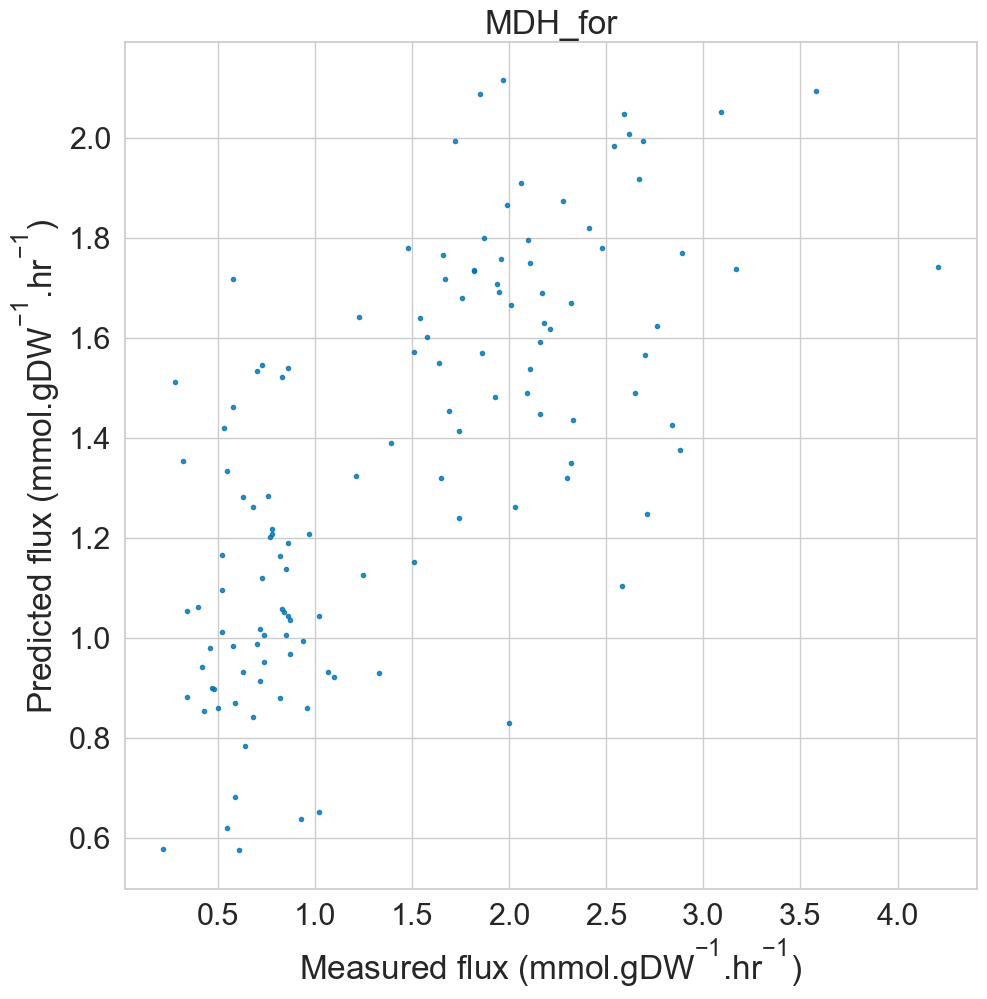

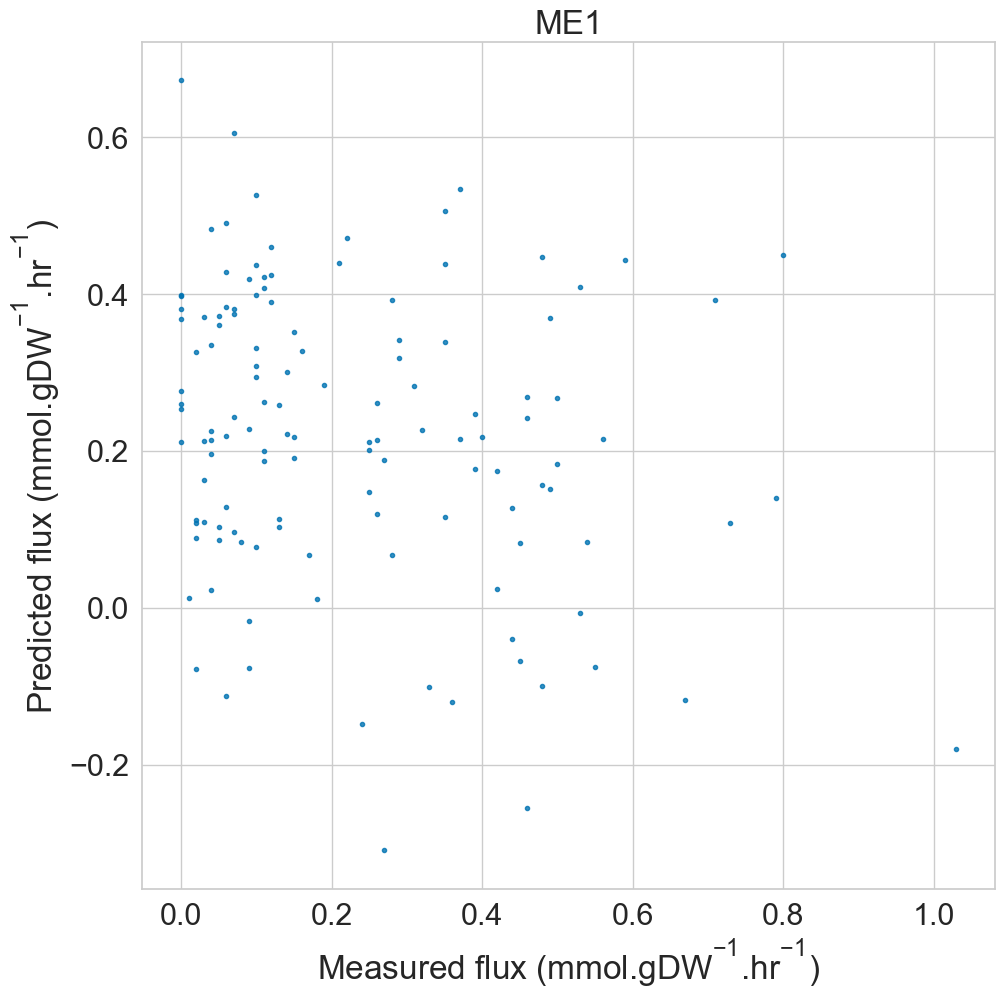

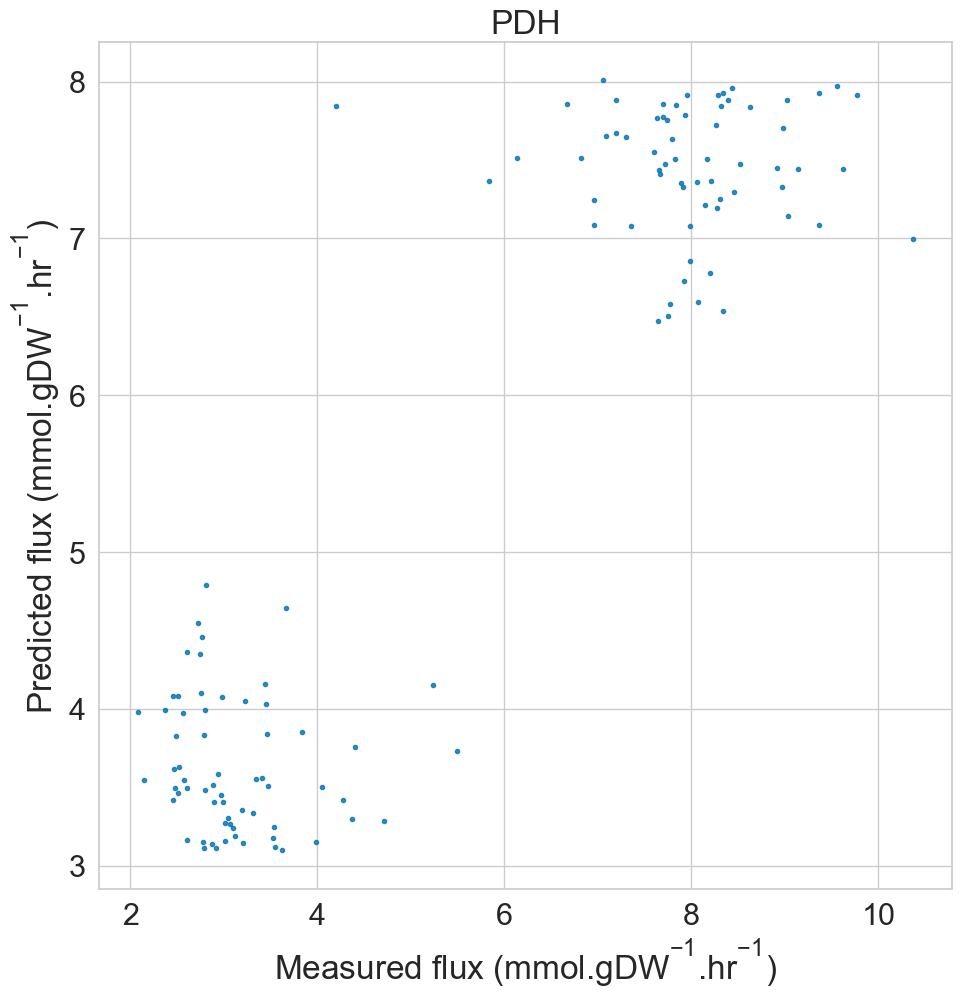

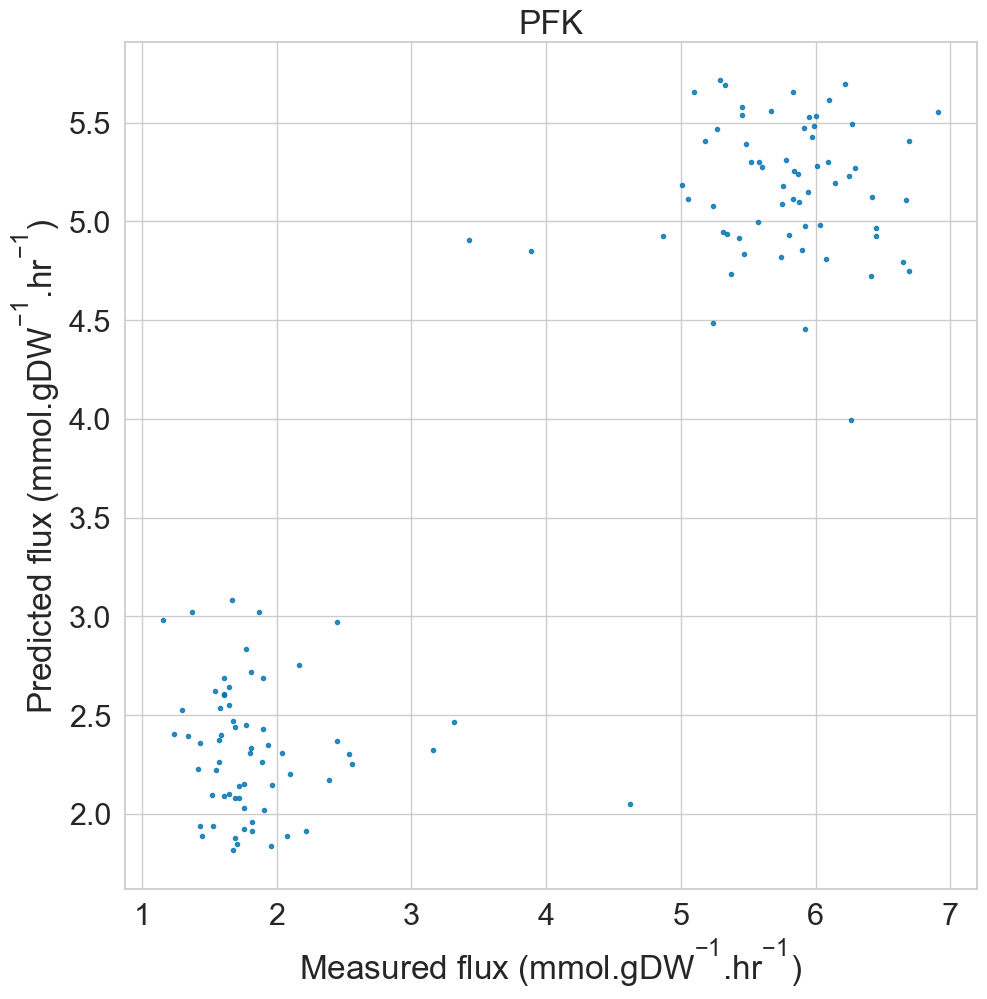

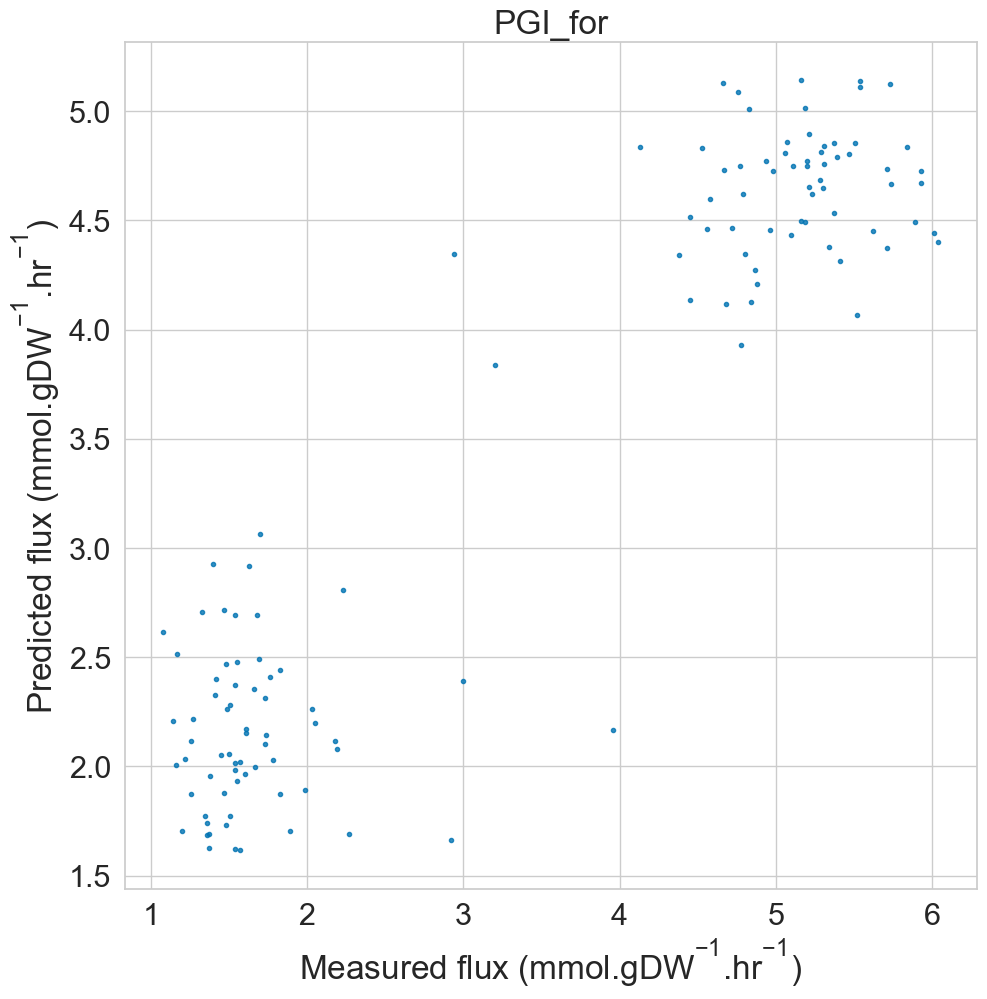

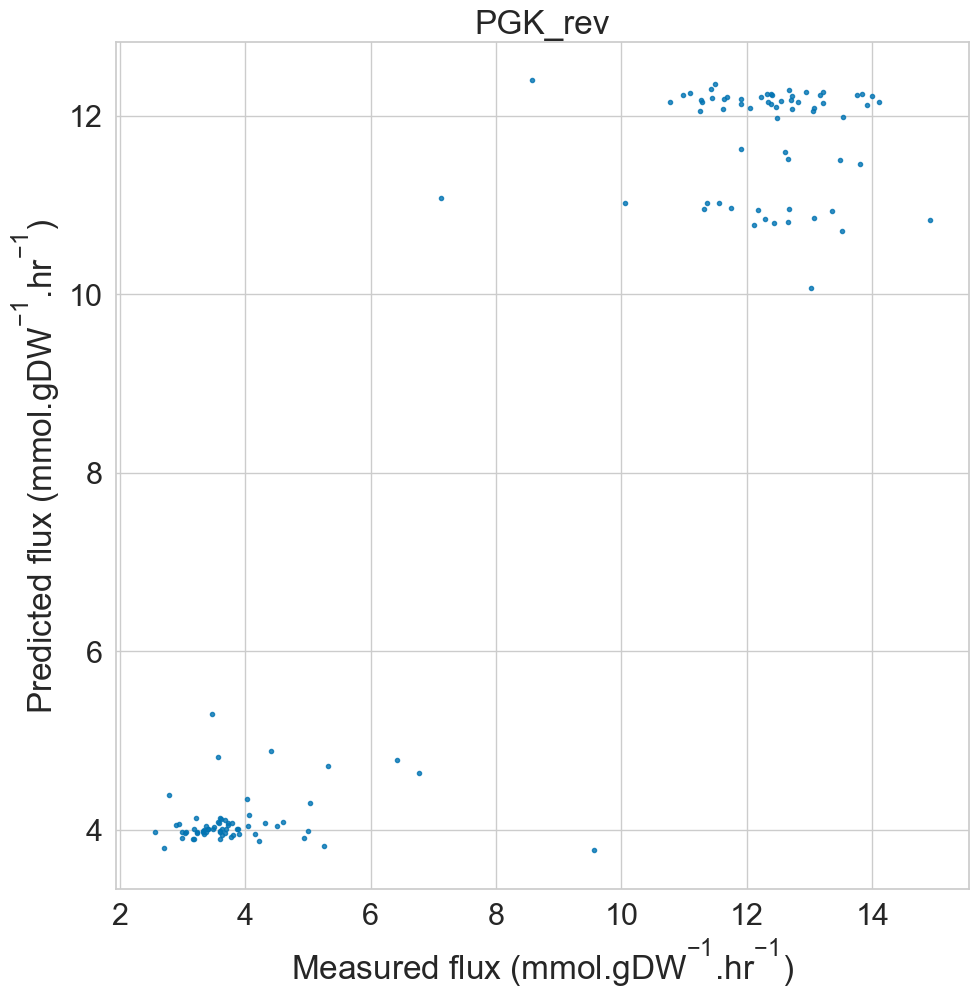

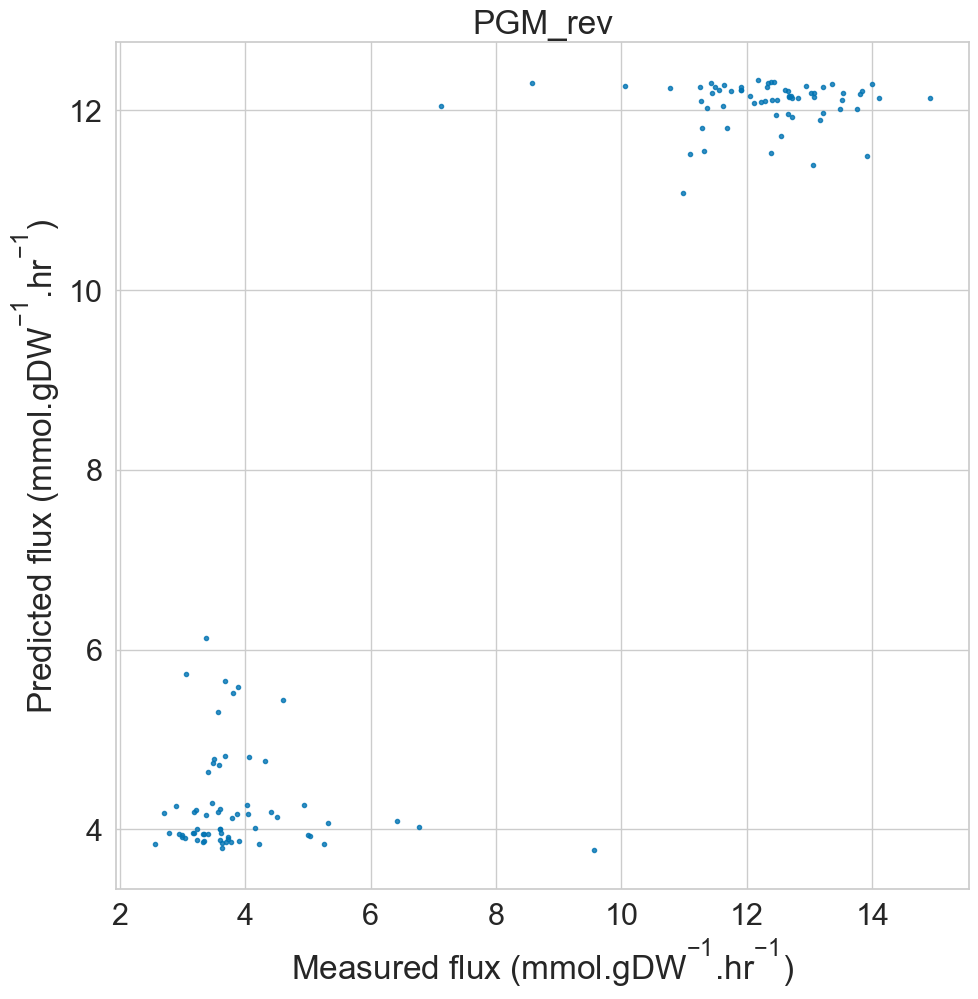

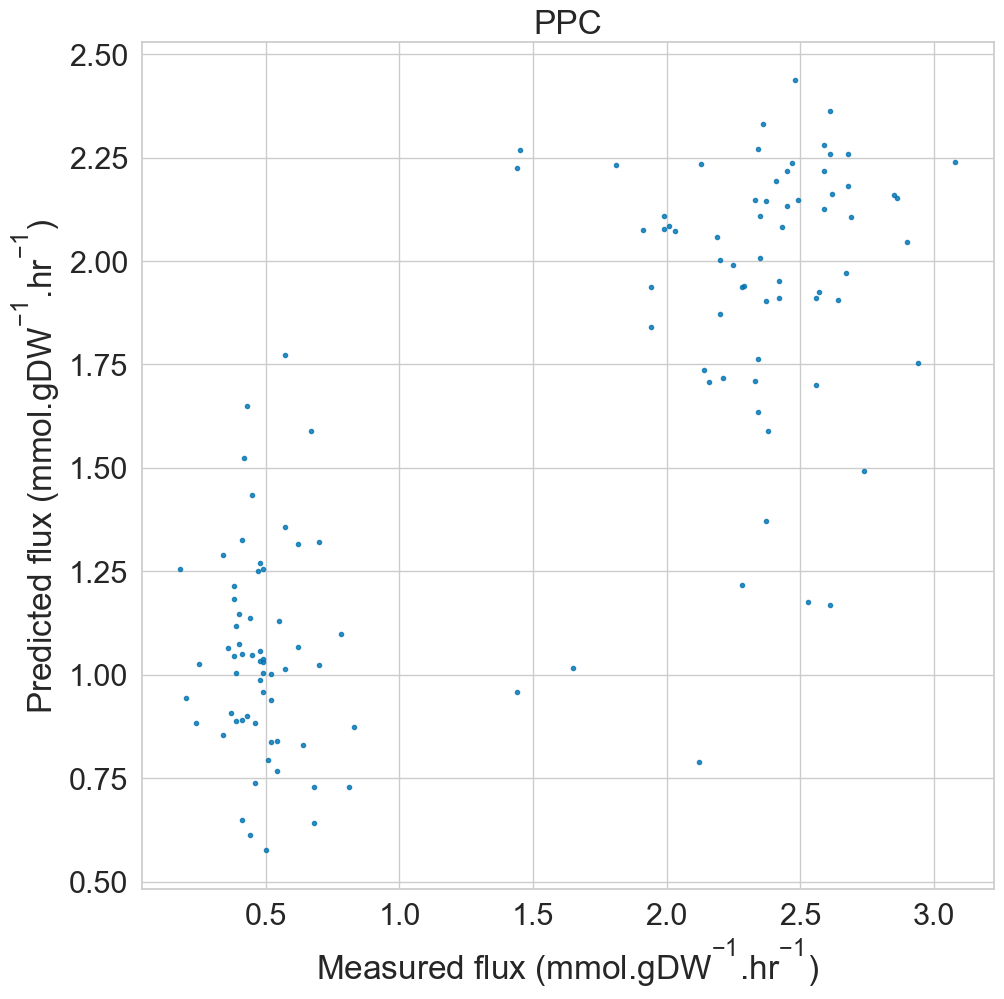

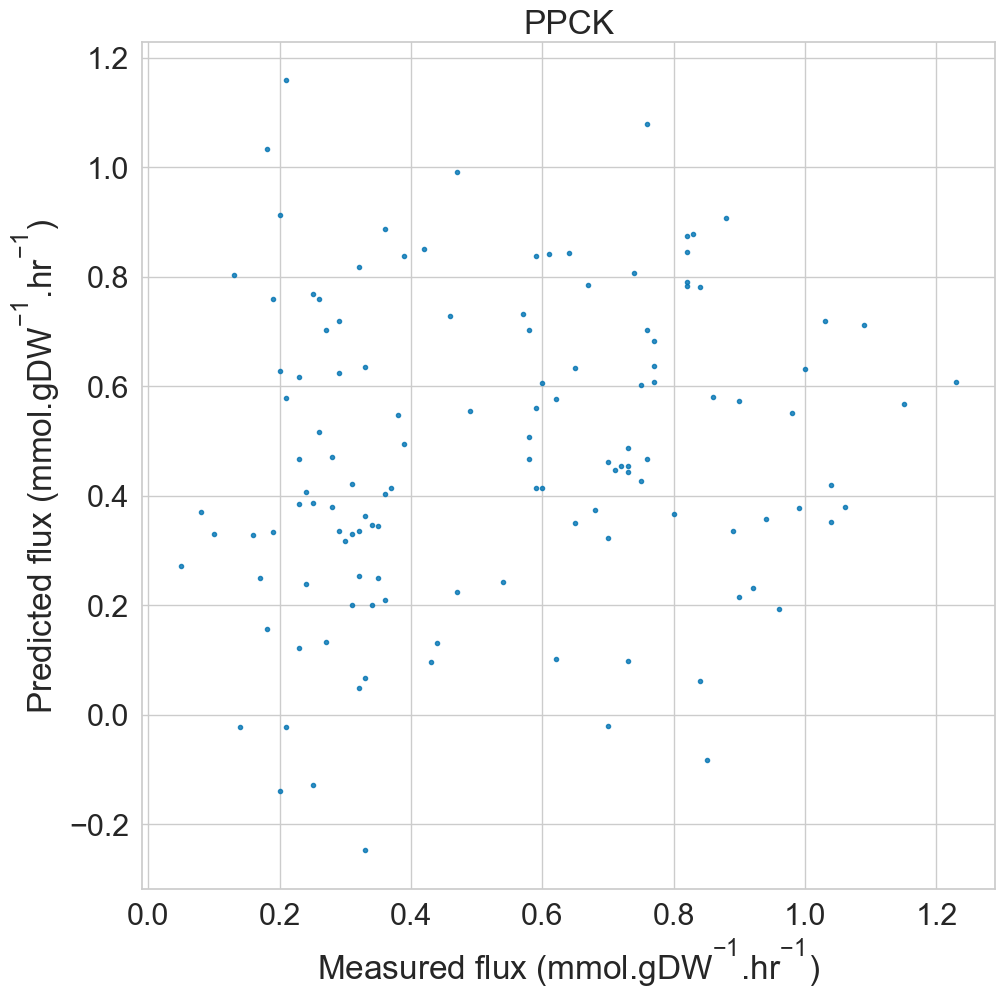

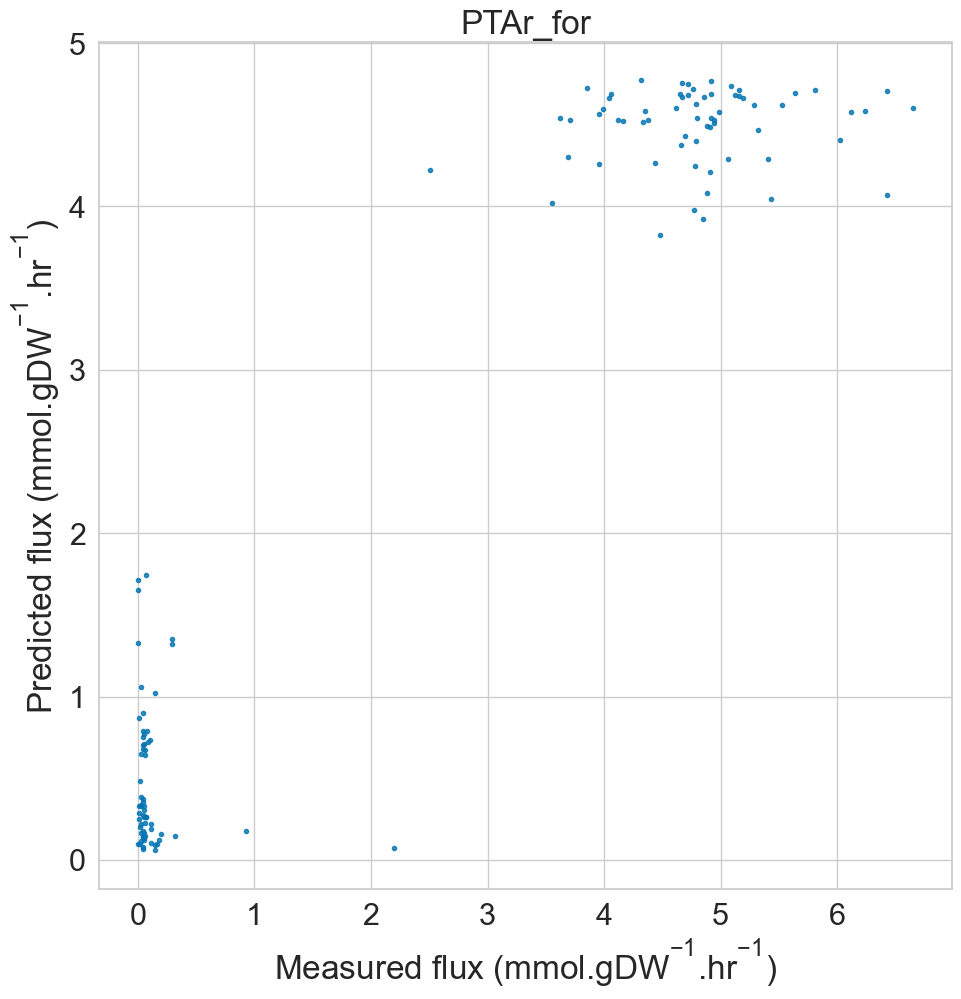

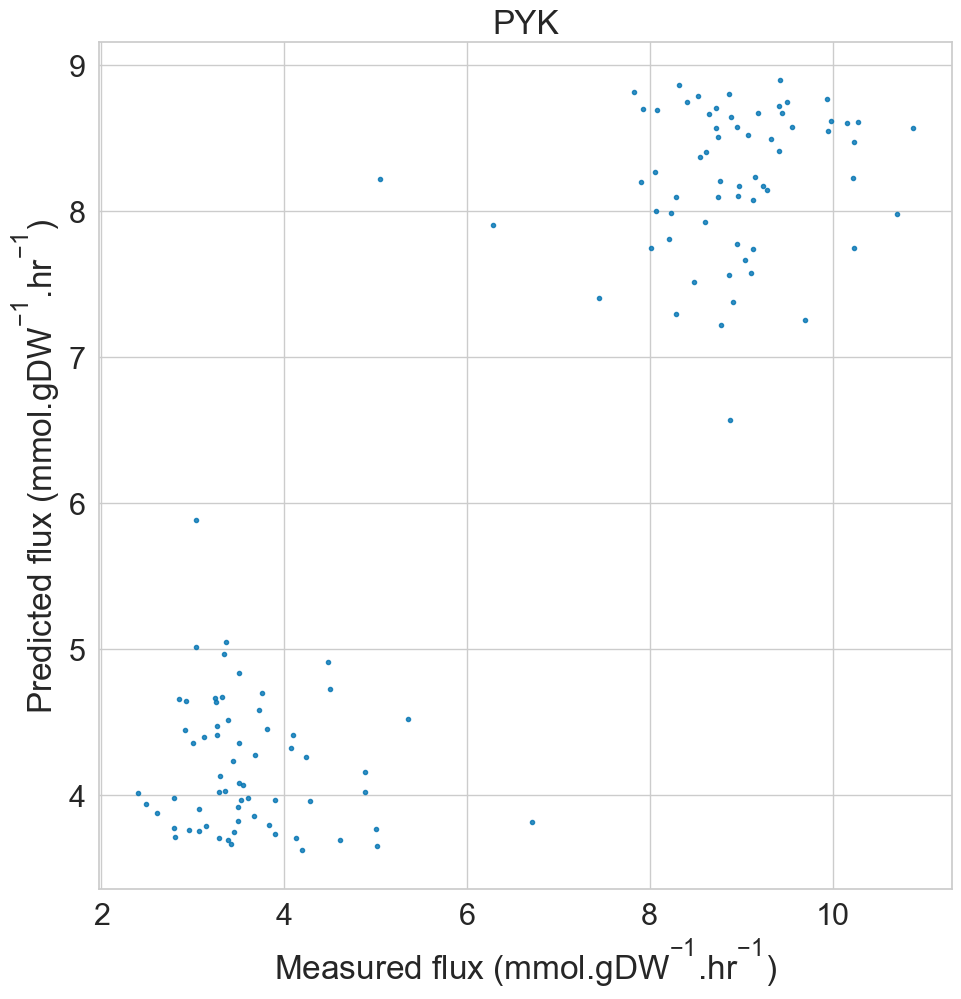

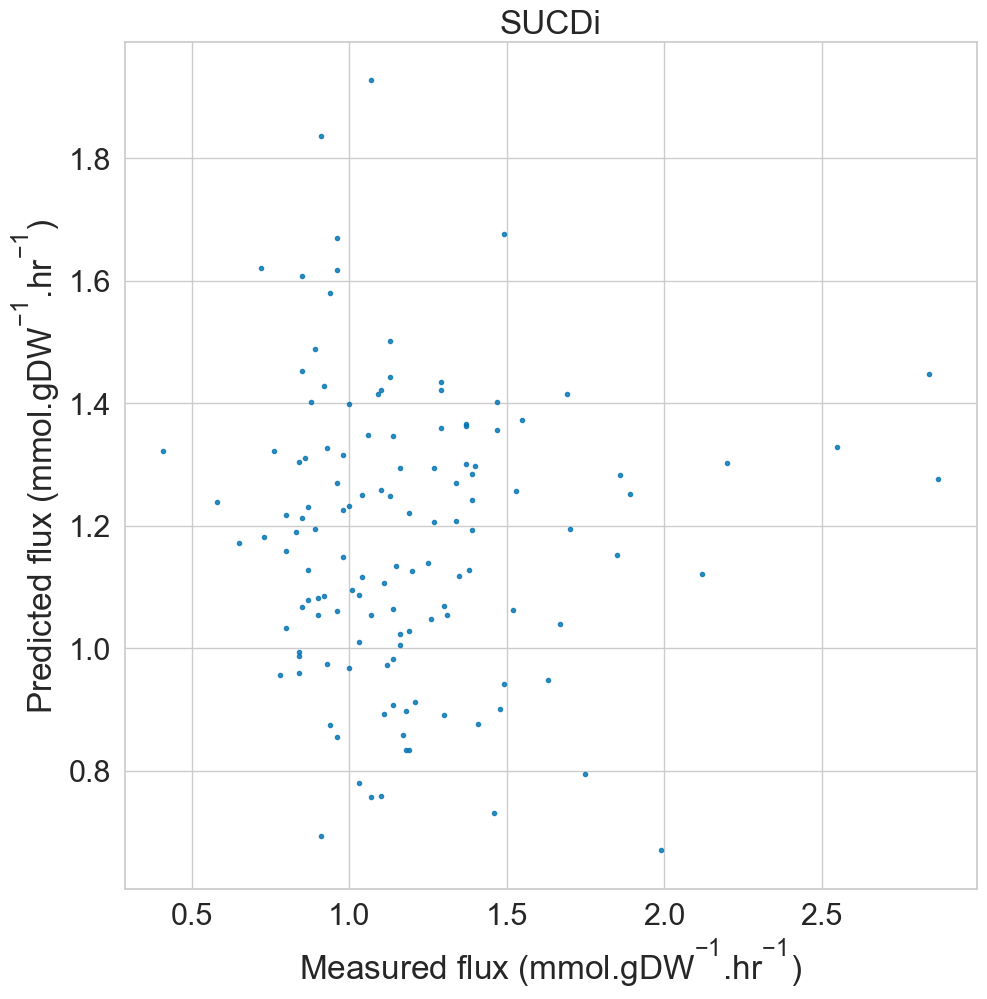

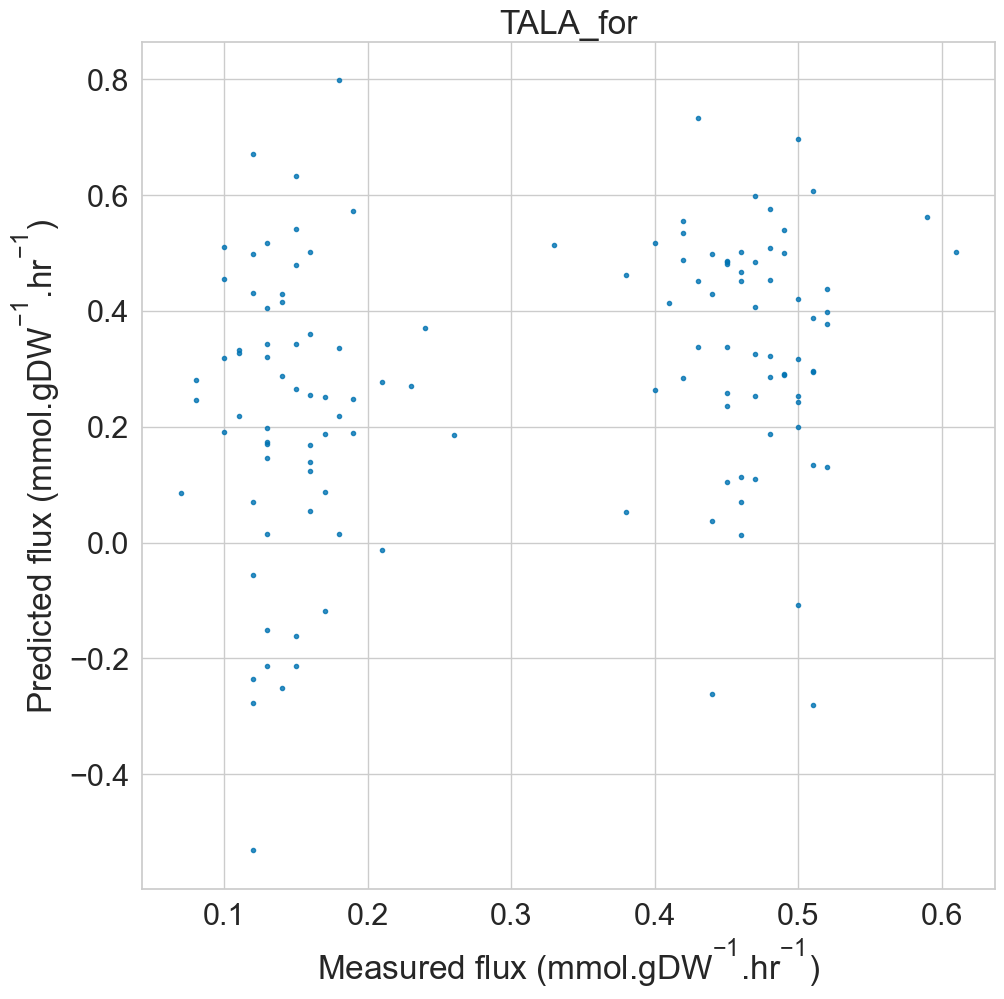

In [10]:
for flux in true_df.columns:
    TRUE = true_df[flux]
    PRED = mean_xgb_pred_df[flux]

    sns.set(font='arial', palette="colorblind", style="whitegrid", font_scale=2, rc={'figure.figsize':(11,11)})
    sns.regplot(x=TRUE, y=PRED, fit_reg=0, marker='.')
    # sns.lineplot([min(TRUE.ravel()), max(TRUE.ravel())], [min(TRUE.ravel()), max(TRUE.ravel())], color='y')
    plt.xlabel("Measured flux (mmol." + r'$\mathregular{gDW^{-1}}$' + '.' + r'$\mathregular{hr^{-1}}$' +")")
    plt.ylabel("Predicted flux (mmol." + r'$\mathregular{gDW^{-1}}$' + '.' + r'$\mathregular{hr^{-1}}$' +")")
    # plt.xlim(min(TRUE)-0.01, max(TRUE)+0.05)
    # plt.ylim(min(PRED)-0.02, max(PRED)+0.05)
    plt.title(str(flux))
    plt.show()
    # plt.savefig("RegPerf_cobra.png", dpi=500)

<AxesSubplot:>

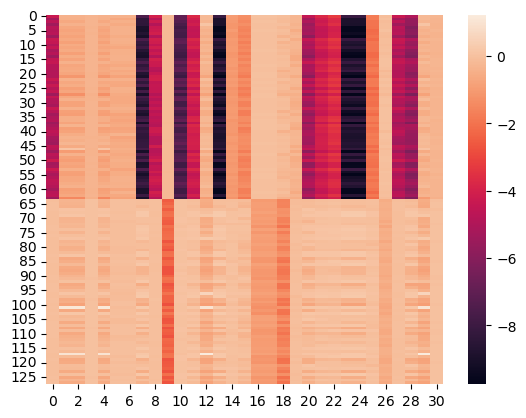

In [6]:
sns.heatmap(mean_xgb_pred)

<AxesSubplot:>

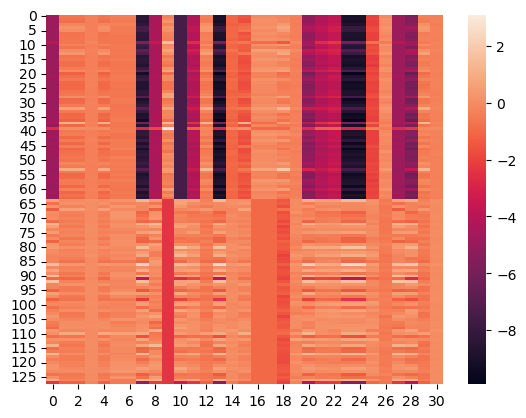

In [7]:
sns.heatmap(Y)

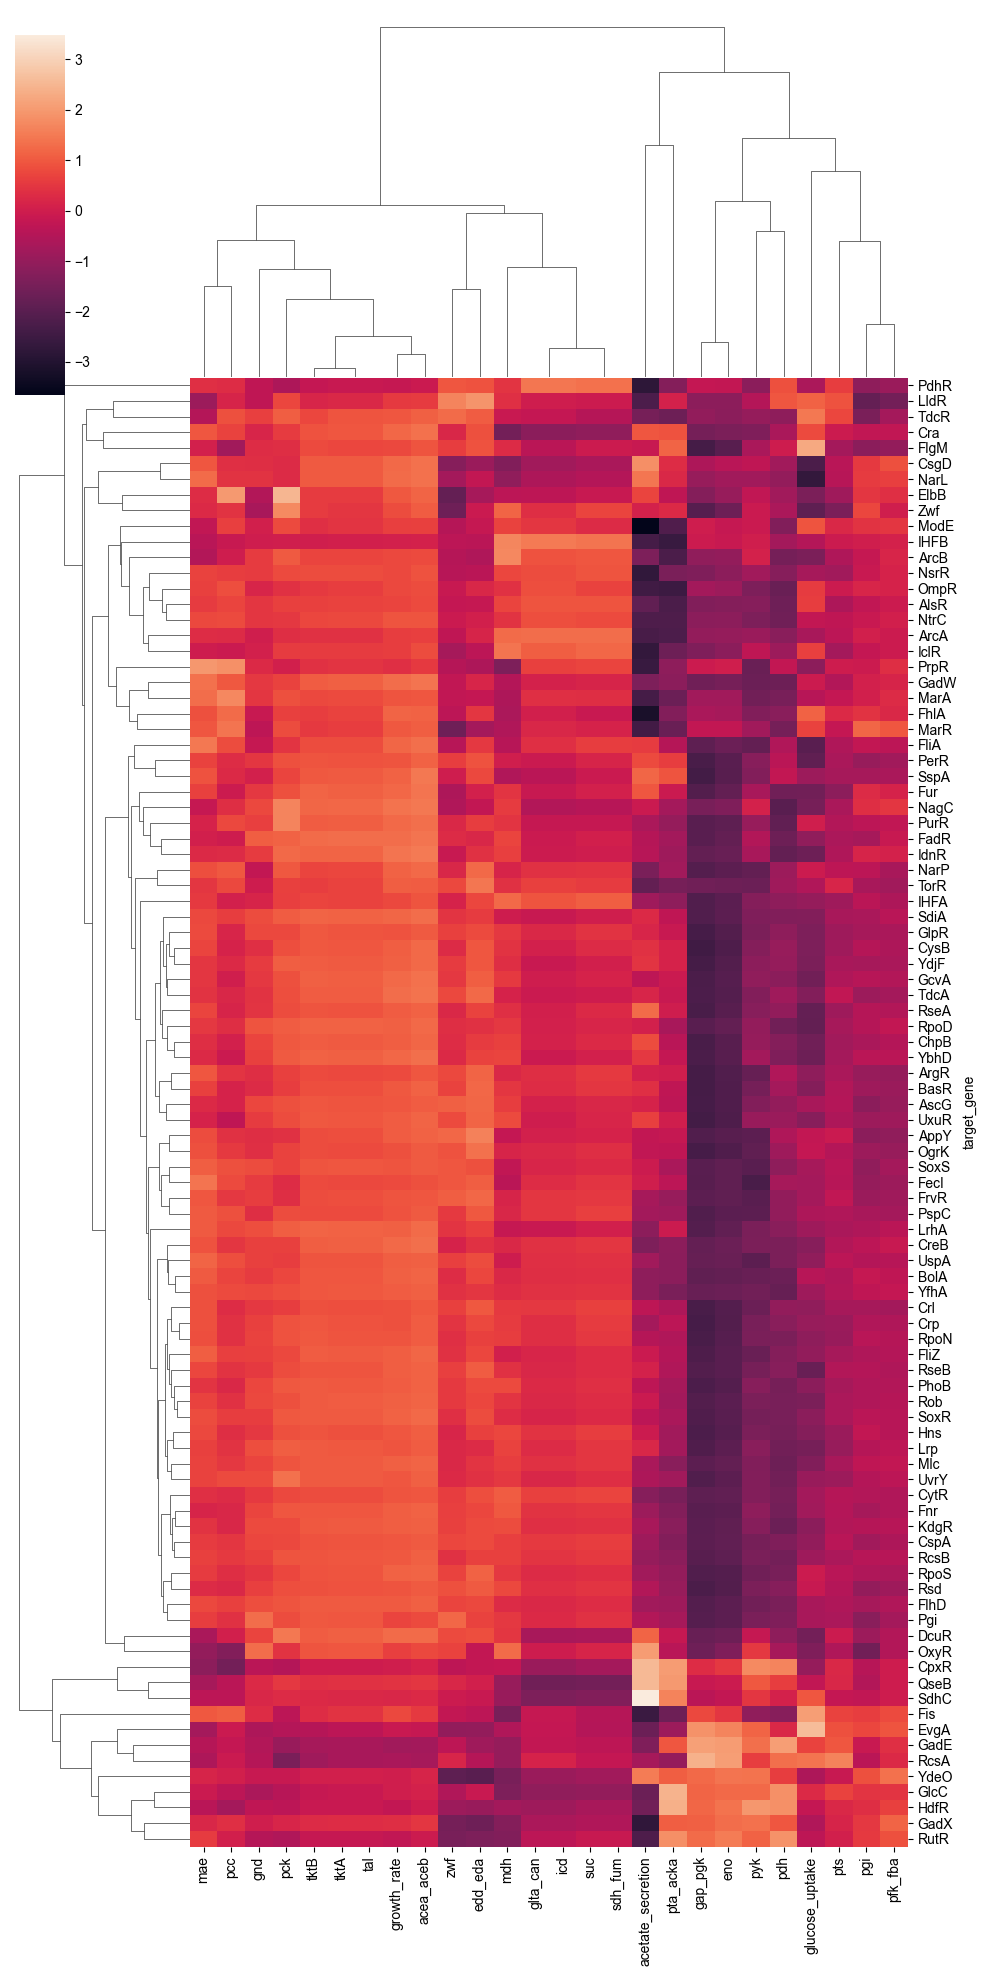

In [3]:
plt.close('all')
clustergrid = sns.clustermap(all_data_norm, z_score=0, figsize=(10,20), yticklabels=True)
ordered_fluxes_indices = clustergrid.dendrogram_col.reordered_ind
ordered_genes_indices = clustergrid.dendrogram_row.reordered_ind
sns.set_theme(palette="colorblind")
plt.show()

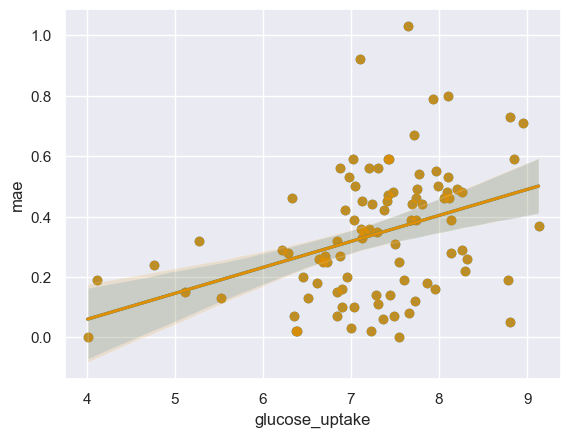

In [9]:
sns.regplot(data=all_data, x="glucose_uptake", y="mae")
plt.show()

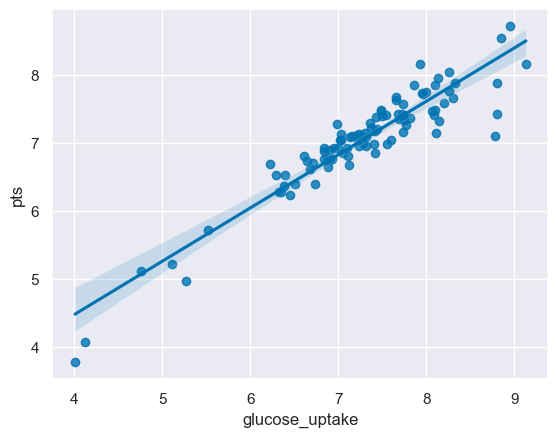

In [11]:
sns.regplot(data=all_data, x="glucose_uptake", y="pts")
plt.show()

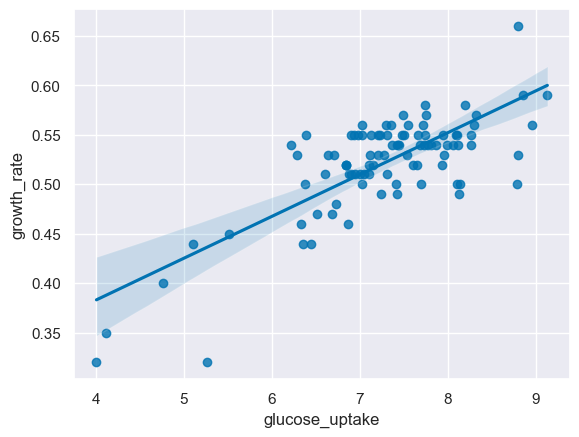

In [13]:
sns.regplot(data=all_data, x="glucose_uptake", y="growth_rate")
plt.show()

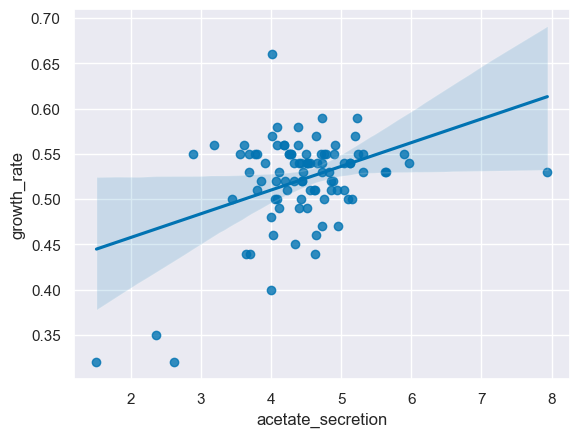

In [14]:
sns.regplot(data=all_data, x="acetate_secretion", y="growth_rate")
plt.show()

(94, 94)


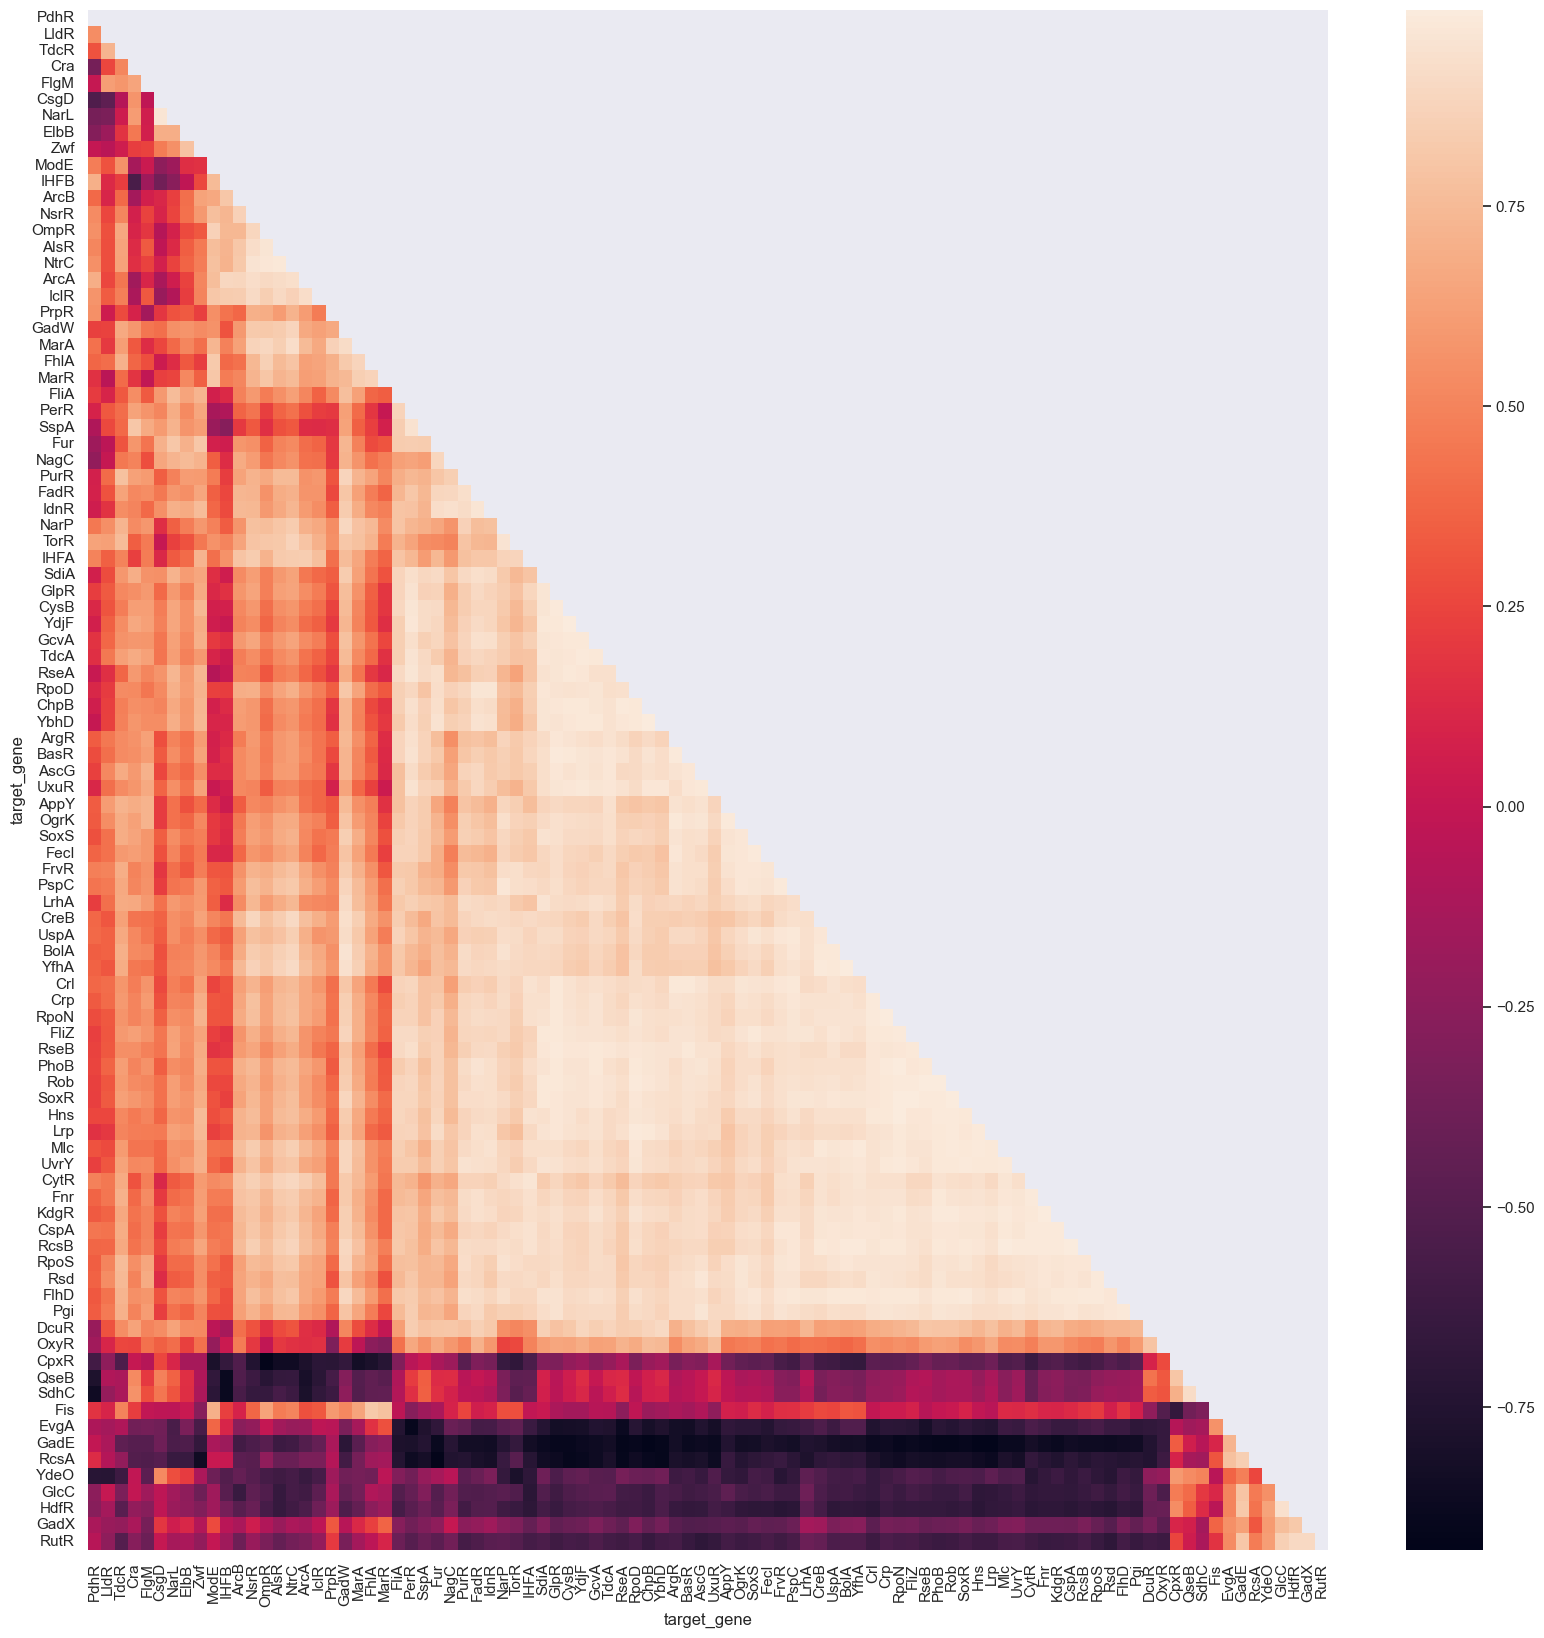

In [18]:
corr_mat_genes = all_data_norm.iloc[ordered_genes_indices].T.corr()
mask = np.triu(np.ones_like(all_data_norm.T.corr()))
print(mask.shape)
fig, ax = plt.subplots(figsize=(20, 20))
g = sns.heatmap(corr_mat_genes, xticklabels=all_data_norm.index[ordered_genes_indices], yticklabels=all_data_norm.index[ordered_genes_indices], mask=mask)
sns.set_theme(palette="colorblind")
plt.show()

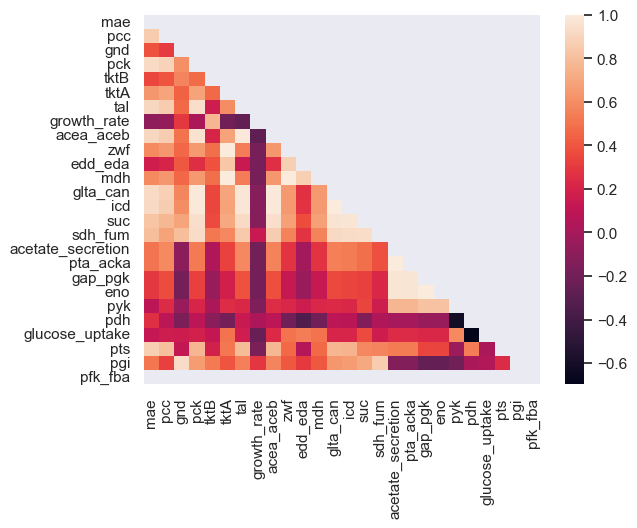

In [19]:
plt.close('all')
corr_mat_fluxes = all_data_norm.iloc[ordered_fluxes_indices].corr()
mask = np.triu(np.ones_like(corr_mat_fluxes))
sns.heatmap(corr_mat_fluxes, xticklabels=all_data.columns[ordered_fluxes_indices], yticklabels=all_data.columns[ordered_fluxes_indices], mask=mask)
sns.set_theme(palette="colorblind")
plt.show()